<a href="https://colab.research.google.com/github/Jpaulo-dev777/API-EasyCarBattery/blob/main/C%C3%B3pia_de_ATUALIZACAO_A3_G%C3%8ANESIS_25_1_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# @title
# Instala a biblioteca
!pip install nbformat

# Limpa os metadados problemáticos
import nbformat
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, clear_output

# Cria um campo de entrada para o nome do notebook
notebook_name_input = widgets.Text(
    value='nome_do_seu_notebook.ipynb', # Sugestão, usuário deve alterar
    description='Nome do Notebook:',
    disabled=False
)
display(notebook_name_input)

def clean_notebook(b):
    with output:
        clear_output(wait=True)
        notebook_path = notebook_name_input.value

        try:
            # Carrega o notebook
            with open(notebook_path, 'r') as f:
                nb = nbformat.read(f, as_version=4)

            # Remove os metadados de widgets
            if 'widgets' in nb.metadata:
                del nb.metadata['widgets']

            # Salva o notebook limpo
            with open(notebook_path, 'w') as f:
                nbformat.write(nb, f)

            print(f"Metadados do notebook '{notebook_path}' limpos com sucesso!")
        except FileNotFoundError:
            print(f"Erro: O arquivo '{notebook_path}' não foi encontrado. Por favor, verifique o nome e o caminho do arquivo.")
        except Exception as e:
            print(f"Ocorreu um erro ao limpar o notebook: {e}")

# Botão para executar a limpeza
clean_button = widgets.Button(description="Limpar Metadados")
output = widgets.Output()
clean_button.on_click(clean_notebook)

display(clean_button, output)

Text(value='nome_do_seu_notebook.ipynb', description='Nome do Notebook:')

Button(description='Limpar Metadados', style=ButtonStyle())

Output()


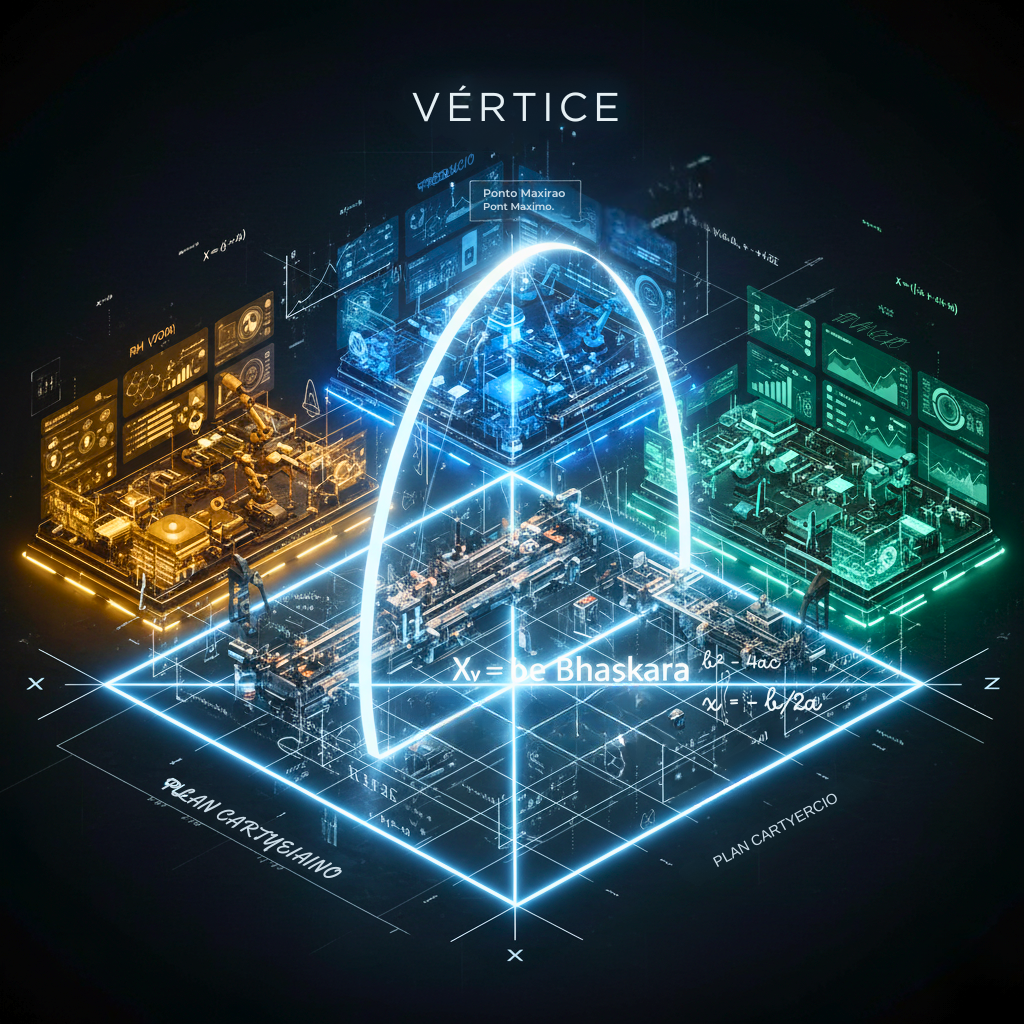

In [19]:
# @title
import os
from IPython.display import display, HTML
from PIL import Image
import base64
from io import BytesIO

image_path = '/content/drive/MyDrive/Colab Notebooks/Xybe Bhaskara x=b+.png'

if os.path.exists(image_path):
    try:
        # Attempt to open the image with PIL to check its integrity
        img = Image.open(image_path)

        # Convert image to base64 to embed directly in HTML
        buffered = BytesIO()
        img.save(buffered, format="PNG") # Assuming PNG, adjust if original is different
        img_str = base64.b64encode(buffered.getvalue()).decode()

        # Display using base64 encoded data
        display(HTML(f'<div style="text-align: center;"><img src="data:image/png;base64,{img_str}" style="width: 80%;"></div>'))

    except Exception as e:
        # If there's an error, still print the message for debugging
        print(f"❌ Could not process or display image: {e}")
        print("The image file might be corrupted or in an unsupported format. Please try re-uploading a valid image file (e.g., JPEG, PNG).")
else:
    print(f"❌ Image file NOT found at: {image_path}")
    print("Please ensure the image is uploaded to the Colab environment in the '/content/' directory.")
    print("You can upload it by clicking the folder icon on the left panel -> 'Files' tab -> 'Upload to session storage'.")

#***Projeto Vértice***
### É uma ferramenta pedagógica e analítica. Ele pega os pilares da matemática que aprendemos na graduação — funções, matrizes e derivadas — e os aplica de forma prática e visual. O objetivo final é ajudar a entender e, mais importante, a tomar decisões melhores em problemas comuns que qualquer empresa enfrenta.

###O código selecionado é uma biblioteca Python para analisar funções matemáticas (lineares e quadráticas) e aplicá-las em simulações de negócios para uma metalúrgica fictícia.

###As partes principais são:

###Analisador Funcoes: Uma classe que sabe tudo sobre funções de 1º e 2º grau. Ela calcula propriedades como raízes, vértice, etc., e plota gráficos bonitos.
###Simulador Empresa: Uma classe que usa o Analisador Funcoes para simular cenários empresariais em vários setores (Financeiro, Logística, Produção, RH, Marketing, Manutenção). Ela traduz os resultados matemáticos para a linguagem de negócios.
###Funções de Interface (criar_interface, exemplos_prontos, criar_interface_empresa): Criam os painéis interativos que você vê no Colab, com campos para inserir dados e botões para executar as análises e simulações.
###Temos também simuladores interativo que demonstra um caso de uso real da Regra do Produto em derivadas, aplicado a um cenário de negócios
###Em resumo, o código pega conceitos de matemática (funções, matrizes e derivadas) e os aplica de forma prática e visual para ajudar a entender problemas e decisões comuns em uma empresa.


In [20]:
# @title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# @title
import matplotlib.pyplot as plt
#matplotlib.pyplot: Utilizada porque permite gerar gráficos de alta qualidade

import numpy as np
# numpy: Empregada devido à sua capacidade de realizar cálculos matemáticos
# e manipulação de vetores e matrizes de forma eficiente

from matplotlib.patches import FancyBboxPatch
#FancyBboxPatch (de matplotlib.patches): Incluída para possibilitar a criação
# de elementos gráficos avançados, como caixas, molduras e destaques visuais nos gráficos

from IPython.display import display, HTML, clear_output
#IPython.display (display, HTML, clear_output): Utilizada porque fornece ferramentas para controlar a saída visual
# no ambiente Jupyter Notebook, permitindo atualizar gráficos, inserir elementos HTML e limpar
# a tela durante a execução de interfaces interativas.

import ipywidgets as widgets
#ipywidgets: Selecionada para criar controles interativos (sliders, botões, caixas de seleção)

from typing import Tuple, Optional, Dict
#typing (Tuple, Optional, Dict): Adicionada para melhorar a organização do código por meio de tipagem. Essa prática contribui para um código mais legível,
# seguro e fácil de manter, importante especialmente em projetos acadêmicos e colaborativos.

import warnings
#warnings: Utilizada para controlar e personalizar mensagens de aviso durante a execução do código


def setup_environment():
    """Configura o ambiente de plotagem e avisos."""
    warnings.filterwarnings('ignore')
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.rcParams['figure.facecolor'] = '#f8f9fa'
    plt.rcParams['axes.facecolor'] = '#ffffff'
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

# =======================================================================
#    CLASSE BASE DE ANÁLISE DE FUNÇÕES
# =======================================================================

class AnalisadorFuncoes:
    """
    Classe principal para análise e visualização de funções matemáticas.
    """

    def __init__(self):
        self.cores = {
            'linear': '#2E86DE',
            'quadratica': '#EE5A6F',
            'raiz': '#26de81',
            'vertice': '#fd79a8',
            'intercepto': '#a29bfe',
            'grid': '#dfe6e9'
        }

    def _criar_cabecalho(self, titulo: str, subtitulo: str = "") -> None:
        """Cria cabeçalho visual profissional"""
        html = f"""
        <div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                    padding: 25px; border-radius: 15px; margin: 20px 0;
                    box-shadow: 0 10px 30px rgba(0,0,0,0.2);">
            <h1 style="color: white; text-align: center; margin: 0;
                       font-size: 32px; font-weight: 700; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
                {titulo}
            </h1>
            <p style="color: #e0e0e0; text-align: center; margin: 10px 0 0 0;
                      font-size: 16px; font-weight: 300;">
                {subtitulo}
            </p>
        </div>
        """
        display(HTML(html))

    def _criar_card_propriedades(self, propriedades: Dict, titulo_card: str = "📊 Propriedades da Função") -> None:
        """Cria card visual com propriedades da função"""
        items_html = ""
        for chave, valor in propriedades.items():
            items_html += f"""
            <div style="background: #f8f9fa; padding: 12px; margin: 8px 0;
                        border-left: 4px solid #667eea; border-radius: 5px;">
                <strong style="color: #2d3436; font-size: 14px;">{chave}:</strong>
                <span style="color: #636e72; font-size: 14px; margin-left: 10px;">{valor}</span>
            </div>
            """

        html = f"""
        <div style="background: white; padding: 20px; border-radius: 10px;
                    box-shadow: 0 5px 15px rgba(0,0,0,0.1); margin: 20px 0;">
            <h3 style="color: #2d3436; margin-top: 0; border-bottom: 2px solid #667eea;
                       padding-bottom: 10px;">{titulo_card}</h3>
            {items_html}
        </div>
        """
        display(HTML(html))

    def analisar_linear(self, a: float, b: float, mostrar_grafico: bool = True, x_label: str = 'x', y_label: str = 'f(x)') -> Dict:
        """ Analisa função linear f(x) = ax + b """
        if not isinstance(a, (int, float)) or not isinstance(b, (int, float)):
            raise ValueError("Os coeficientes devem ser números!")
        raiz = -b / a if a != 0 else None
        crescimento = "Crescente ↗" if a > 0 else ("Decrescente ↘" if a < 0 else "Constante →")
        comportamento_icon = "📈" if a > 0 else ("📉" if a < 0 else "➡️")

        propriedades = {
            "Equação": f"f({x_label}) = {a}{x_label} + {b}",
            "Tipo": "Função Linear (1º Grau)",
            "Coeficiente Angular (a)": f"{a} {comportamento_icon}",
            "Coeficiente Linear (b)": f"{b}",
            "Comportamento": crescimento,
            "Raiz (Zero da função)": f"{x_label} = {raiz:.4f}" if raiz is not None else "Não existe",
            "Interseção com Eixo Y": f"(0, {b})",
        }
        if mostrar_grafico:
            self._plotar_linear(a, b, raiz, x_label, y_label)
        self._criar_card_propriedades(propriedades)
        return propriedades

    def _plotar_linear(self, a: float, b: float, raiz: Optional[float], x_label: str, y_label: str) -> None:
        fig, ax = plt.subplots(figsize=(12, 7))
        lim_max = 10
        if raiz is not None and raiz > 0:
            lim_max = max(10, abs(raiz) * 2)
        elif raiz is None and a == 0:
             lim_max = 10
        elif b != 0:
             lim_max = max(10, abs(b) * 2)

        x = np.linspace(0, lim_max, 500) # Foco em valores positivos para negócios
        y = a * x + b
        ax.plot(x, y, color=self.cores['linear'], linewidth=3, label=f'{y_label} = {a} * {x_label} + {b}', zorder=3)
        ax.axhline(y=0, color='black', linewidth=1.5, alpha=0.7, zorder=1)
        ax.axvline(x=0, color='black', linewidth=1.5, alpha=0.7, zorder=1)
        if raiz is not None and raiz >= 0:
            ax.plot(raiz, 0, 'o', color=self.cores['raiz'], markersize=15, label=f'Raiz: ({raiz:.2f}, 0)', zorder=5)
        ax.plot(0, b, 'o', color=self.cores['intercepto'], markersize=15, label=f'Intercepto Y: (0, {b})', zorder=5)
        ax.set_xlabel(x_label, fontsize=14, fontweight='bold')
        ax.set_ylabel(y_label, fontsize=14, fontweight='bold')
        ax.set_title(f'Gráfico da Função Linear: {y_label} vs {x_label}', fontsize=16, fontweight='bold', pad=20)
        ax.legend(loc='best', fontsize=11, framealpha=0.95, shadow=True)
        ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, color=self.cores['grid'])
        y_min_lim = min(0, b)
        y_max_lim = max(np.max(y), b)
        ax.set_xlim(0, lim_max)
        ax.set_ylim(y_min_lim - (abs(y_min_lim)*0.1 + 5), y_max_lim + (abs(y_max_lim)*0.1 + 5))

        plt.tight_layout()
        display(fig) # Força o gráfico a aparecer no widget
        plt.close(fig) # Limpa a memória para o próximo gráfico


    def analisar_quadratica(self, a: float, b: float, c: float,
                            mostrar_grafico: bool = True, x_label: str = 'x', y_label: str = 'f(x)') -> Dict:
        """ Analisa função quadrática f(x) = ax² + bx + c """
        if a == 0: raise ValueError("Para função quadrática, 'a' não pode ser zero!")
        if not all(isinstance(x, (int, float)) for x in [a, b, c]):
            raise ValueError("Os coeficientes devem ser números!")

        delta = b**2 - 4*a*c
        xv = -b / (2*a)
        yv = a * xv**2 + b * xv + c
        concavidade = "Para CIMA (∪)" if a > 0 else "Para BAIXO (∩)"
        tipo_vertice = "Ponto de MÍNIMO" if a > 0 else "Ponto de MÁXIMO"

        if delta > 0:
            x1 = (-b + np.sqrt(delta)) / (2*a)
            x2 = (-b - np.sqrt(delta)) / (2*a)
            raizes_texto = f"{x_label}₁ = {x1:.4f} e {x_label}₂ = {x2:.4f}"
            raizes = (x1, x2)
        elif delta == 0:
            x_raiz = -b / (2*a)
            raizes_texto = f"{x_label} = {x_raiz:.4f}"
            raizes = (x_raiz,)
        else:
            raizes_texto = "Não existem raízes reais"
            raizes = None

        propriedades = {
            "Equação": f"{y_label} = {a}{x_label}² + {b}{x_label} + {c}",
            "Tipo": "Função Quadrática (2º Grau)",
            "Concavidade": f"{concavidade} {'🙂' if a > 0 else '🙃'}",
            "Vértice": f"V({xv:.4f}, {yv:.4f}) - {tipo_vertice}",
            "Discriminante (Δ)": f"{delta:.4f}",
            "Raízes": f"{raizes_texto}",
            "Eixo de Simetria": f"{x_label} = {xv:.4f}",
            "Interseção com Eixo Y": f"(0, {c})",
        }
        if mostrar_grafico:
            self._plotar_quadratica(a, b, c, xv, yv, delta, raizes, x_label, y_label)
        self._criar_card_propriedades(propriedades)
        return propriedades

    def _plotar_quadratica(self, a: float, b: float, c: float,
                           xv: float, yv: float, delta: float,
                           raizes: Optional[Tuple], x_label: str, y_label: str) -> None:
        fig, ax = plt.subplots(figsize=(12, 7))
        x_range = max(abs(xv) * 1.5, 10)
        x_min = 0 # Foco em negócios
        x_max = max(x_range, xv + x_range / 2)
        if raizes:
            real_raizes = [r for r in raizes if r > 0]
            if real_raizes:
                x_max = max(x_max, max(real_raizes) * 1.2)
        if xv > 0:
             x_max = max(x_max, xv * 2)

        x = np.linspace(x_min, x_max, 500)
        y = a * x**2 + b * x + c

        ax.plot(x, y, color=self.cores['quadratica'], linewidth=3, label=f'{y_label} = {a}{x_label}² + {b}{x_label} + {c}', zorder=3)
        ax.axhline(y=0, color='black', linewidth=1.5, alpha=0.7, zorder=1)
        ax.axvline(x=0, color='black', linewidth=1.5, alpha=0.7, zorder=1)

        if xv > 0:
            ax.axvline(x=xv, color='purple', linewidth=2, linestyle='--', alpha=0.5, label=f'Eixo de simetria: {x_label} = {xv:.2f}', zorder=2)
            ax.plot(xv, yv, 'o', color=self.cores['vertice'], markersize=18, label=f'Vértice: ({xv:.2f}, {yv:.2f})', zorder=5)

        if raizes is not None:
            for i, raiz in enumerate(raizes):
                if raiz >= 0 and x_min <= raiz <= x_max:
                    ax.plot(raiz, 0, 'o', color=self.cores['raiz'], markersize=15, zorder=5, label=f'Raiz {i+1}: ({raiz:.2f}, 0)')

        ax.plot(0, c, 'o', color=self.cores['intercepto'], markersize=15, label=f'Intercepto Y: (0, {c})', zorder=5)
        ax.set_xlabel(x_label, fontsize=14, fontweight='bold')
        ax.set_ylabel(y_label, fontsize=14, fontweight='bold')
        ax.set_title(f'Gráfico da Função Quadrática: {y_label} vs {x_label}', fontsize=16, fontweight='bold', pad=20)
        ax.legend(loc='best', fontsize=10, framealpha=0.95, shadow=True)
        ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, color=self.cores['grid'])

        y_min_plot = min(0, c, yv if a > 0 else np.min(y))
        y_max_plot = max(c, yv if a < 0 else np.max(y))
        y_padding = max(abs(y_min_plot*0.1), abs(y_max_plot*0.1), 5)
        ax.set_ylim(y_min_plot - y_padding, y_max_plot + y_padding)
        ax.set_xlim(left=0)

        plt.tight_layout()
        display(fig) # Força o gráfico a aparecer no widget
        plt.close(fig) # Limpa a memória para o próximo gráfico

# =======================================================================
#    CLASSE DO SIMULADOR DE EMPRESA v2.0
# =======================================================================

class SimuladorEmpresa:
    """
    Classe expandida para aplicar conceitos matemáticos a múltiplos setores
    da "Metalúrgica Precisão S.A.".
    """
    def __init__(self):
        # Reutiliza o analisador de funções
        self.analisador = AnalisadorFuncoes()

    # --- Funções Auxiliares de Exibição ---

    def _display_interpretacao_negocio(self, titulo: str, interpretacao: Dict):
        """Mostra a "tradução" da matemática para o negócio."""
        items_html = ""
        for chave, valor in interpretacao.items():
            items_html += f"""
            <div style="background: #fdfdea; padding: 12px; margin: 8px 0;
                        border-left: 4px solid #f9ca24; border-radius: 5px;">
                <strong style="color: #2d3436; font-size: 14px;">{chave}:</strong>
                <span style="color: #636e72; font-size: 14px; margin-left: 10px;">{valor}</span>
            </div>
            """
        html = f"""
        <div style="background: white; padding: 20px; border-radius: 10px;
                    box-shadow: 0 5px 15px rgba(0,0,0,0.1); margin: 20px 0;">
            <h3 style="color: #2d3436; margin-top: 0; border-bottom: 2px solid #f9ca24;
                       padding-bottom: 10px;">💡 {titulo}</h3>
            {items_html}
        </div>
        """
        display(HTML(html))

    def _display_matriz(self, titulo: str, matriz, cabecalho_col, cabecalho_lin, is_resultado=False):
        """Exibe uma matriz ou vetor como uma tabela HTML bonita."""
        matriz = np.asarray(matriz)
        if matriz.ndim == 1:
            if len(cabecalho_lin) == 1: # Vetor-linha
                 matriz = matriz.reshape(1, -1)
            else: # Vetor-coluna
                matriz = matriz.reshape(-1, 1)

        style = """
        <style>
            .matrix-table { border-collapse: collapse; margin: 15px 0; font-family: Arial; box-shadow: 0 2px 5px rgba(0,0,0,0.1); border-radius: 8px; overflow: hidden; }
            .matrix-table th, .matrix-table td { padding: 10px 14px; text-align: center; border: 1px solid #dfe6e9; }
            .matrix-table th { background-color: #6c5ce7; color: black; }
            .matrix-table td:first-child { background-color: green; font-weight: bold; }
            .matrix-table-res th { background-color: green; color: black; }
            .matrix-table-res td:first-child { background-color: green; font-weight: bold; }
        </style>
        """
        tbl_class = "matrix-table-res" if is_resultado else "matrix-table"
        html = style + f"<h4>{titulo}</h4><table class='{tbl_class}'><tr><th>&nbsp;</th>"

        for col in cabecalho_col:
            html += f"<th>{col}</th>"
        html += "</tr>"

        for i, lin in enumerate(cabecalho_lin):
            html += f"<tr><td>{lin}</td>"
            for j in range(len(cabecalho_col)):
                val = matriz[i, j] if matriz.shape[1] == len(cabecalho_col) else matriz[i, 0]
                html += f"<td>{val:.2f}</td>"
            html += "</tr>"
        html += "</table>"
        display(HTML(html))

    # --- SETORES E SIMULAÇÕES ---
    # Calcula o ponto de lucro máximo usando um modelo quadrático (parábola).
    # A fórmula de lucro é L(q) = aq² + bq + c, onde:
    # a = f_demanda (fator de demanda)
    # b = p_base - c_var (margem de contribuição)
    # c = -c_fixo (custo fixo / prejuízo inicial)
    #
    # VALIDAÇÃO CRÍTICA:
    # Para que exista um "lucro máximo" (o vértice), o coeficiente 'a'
    # DEVE ser negativo (parábola com "boca para baixo" ∩).
    # Se 'a' >= 0, o modelo não tem um máximo realista (seria um mínimo U)
    # e, por isso, um erro (ValueError) é lançado.
    def simular_financeiro_lucro(self, p_base: float, f_demanda: float, c_var: float, c_fixo: float):
        self.analisador._criar_cabecalho( "💸 Setor Financeiro: Maximização de Lucro (Quadrática)",
            "L(q) = R(q) - C(q) = (f_demanda)q² + (p_base - c_var)q - c_fixo")
        a = f_demanda
        b = p_base - c_var
        c = -c_fixo
        if a >= 0:
            raise ValueError("O 'Fator Demanda' (a) deve ser negativo para um ponto de lucro máximo.")

        props = self.analisador.analisar_quadratica(a, b, c, True, 'q (Peças)', 'L(q) (Lucro R$)')

        v_str = props.get("Vértice", "V(0, 0)").split('(')[1].split(')')[0].split(',')
        xv, yv = float(v_str[0]), float(v_str[1])
        r_str = props.get("Raízes", "")
        if "e" in r_str:
            r1 = float(r_str.split('q₁ = ')[1].split(' e')[0])
            r2 = float(r_str.split('q₂ = ')[1])
            r_interp = f"A empresa tem lucro se produzir entre {min(r1, r2):.0f} e {max(r1, r2):.0f} peças."
        else:
            r_interp = "A empresa não atinge o lucro ou nunca tem prejuízo."

        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Ponto de MÁXIMO (Vértice)": f"Produzir {xv:.0f} peças gera o Lucro Máximo de R$ {yv:.2f}.",
            "Pontos de Equilíbrio (Raízes)": r_interp,
            "Interpretação de 'c'": f"Se não produzir nada (q=0), a empresa tem um prejuízo de R$ {-c:.2f} (o Custo Fixo)."
        })
    #ponto de equilibrio
    def simular_financeiro_breakeven(self, preco_venda: float, c_var: float, c_fixo: float):
        self.analisador._criar_cabecalho( "💸 Setor Financeiro: Ponto de Equilíbrio (Linear)",
            "Analisando a interseção de R(q) = (Preço)q e C(q) = (C_Var)q + C_Fixo")

        a_r, b_r = preco_venda, 0
        a_c, b_c = c_var, c_fixo

        if a_r <= a_c:
            raise ValueError("O Preço de Venda deve ser MAIOR que o Custo Variável para haver Ponto de Equilíbrio.")

        q_break = b_c / (a_r - a_c)
        r_break = a_r * q_break

        fig, ax = plt.subplots(figsize=(12, 7))
        x = np.linspace(0, q_break * 2, 500)
        y_r = a_r * x + b_r
        y_c = a_c * x + b_c

        # Calcula o Ponto de Equilíbrio (Break-Even) financeiro.
        # Esta função encontra a quantidade (q) onde a Receita Total (R)
        # se iguala ao Custo Total (C), usando um modelo linear.
        #
        # 1. MODELAGEM (Equações da Reta: y = ax + b)
        #    - Reta da Receita (R): R(q) = (preco_venda)q + 0
        #      (a_r = preco_venda, b_r = 0)
        #    - Reta do Custo (C):   C(q) = (c_var)q + c_fixo
        #      (a_c = c_var, b_c = c_fixo)
        #
        # 2. VALIDAÇÃO CRÍTICA
        #    - O preço de venda (a_r) DEVE ser maior que o custo variável (a_c).
        #    - Se for menor ou igual, a margem de contribuição é zero ou negativa,
        #      o negócio é inviável e o break-even nunca é atingido (o prejuízo
        #      apenas aumenta a cada venda).
        #
        # 3. CÁLCULO (Onde R(q) = C(q))
        #    - (a_r * q) = (a_c * q) + b_c
        #    - (a_r - a_c) * q = b_c
        #    - q_break = b_c / (a_r - a_c)
        #
        #    - r_break calcula o faturamento (R$) exato nesse ponto 'q'.

        ax.plot(x, y_r, color=self.analisador.cores['linear'], linewidth=3, label=f'Receita R(q) = {a_r:.2f}q')
        ax.plot(x, y_c, color=self.analisador.cores['quadratica'], linewidth=3, label=f'Custo C(q) = {a_c:.2f}q + {b_c:.2f}')

        ax.plot(q_break, r_break, 'o', color=self.analisador.cores['vertice'], markersize=18, label=f'Breakeven ({q_break:.0f}, {r_break:.2f})', zorder=5)
        ax.axvline(q_break, color='purple', linestyle='--', alpha=0.5)
        ax.axhline(r_break, color='purple', linestyle='--', alpha=0.5)

        ax.fill_between(x, y_r, y_c, where=(y_r > y_c), color='green', alpha=0.2, label='Lucro')
        ax.fill_between(x, y_r, y_c, where=(y_r < y_c), color='red', alpha=0.2, label='Prejuízo')

        ax.set_xlabel('q (Peças)', fontsize=14)
        ax.set_ylabel('R$ (Valor)', fontsize=14)
        ax.set_title('Análise de Ponto de Equilíbrio (Breakeven)', fontsize=16, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_xlim(left=0)
        ax.set_ylim(bottom=0)

        display(fig)
        plt.close(fig)

        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Ponto de Equilíbrio": f"A empresa precisa vender {q_break:.0f} peças para 'se pagar'.",
            "Receita de Equilíbrio": f"Isso corresponde a uma receita de R$ {r_break:.2f}.",
            "Margem de Contribuição": f"Cada peça vendida 'contribui' com R$ {a_r - a_c:.2f} para pagar o Custo Fixo."
        })

    def simular_financeiro_juros(self, principal: float, taxa_anual: float, tempo_meses: int):
        self.analisador._criar_cabecalho( "💸 Setor Financeiro: Projeção de Dívida (Juros Simples)",
            "M(t) = (P * i)t + P")
        taxa_mensal = taxa_anual / 12
        a = principal * taxa_mensal
        b = principal
        props = self.analisador.analisar_linear(a, b, True, 't (Meses)', 'M(t) (Dívida R$)')
        divida_final = a * tempo_meses + b
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Problema": "Empréstimo de Capital de Giro com juros simples.",
            "Coeficiente 'a' (Juros/mês)": f"A dívida cresce R$ {a:.2f} por mês.",
            "Coeficiente 'b' (Principal)": f"O valor inicial da dívida (em t=0) é R$ {b:.2f}.",
            "Projeção": f"Ao final de {tempo_meses} meses, a dívida total será de R$ {divida_final:.2f}."
        })

    def simular_financeiro_valor_estoque(self):
        self.analisador._criar_cabecalho( "💸 Setor Financeiro: Valor do Estoque (Matriz)",
            "ValorTotal = Vetor_Estoque • Vetor_Custo")
        vetor_estoque = np.array([5000, 8000]) # 5k Parafusos, 8k Porcas
        vetor_custo = np.array([2.10, 1.65]) # Custo unitário de cada
        self._display_matriz("Vetor de Estoque (q)", vetor_estoque, ['Parafuso', 'Porca'], ['Quantidade'])
        self._display_matriz("Vetor de Custo (R$/un)", vetor_custo, ['Parafuso', 'Porca'], ['Custo Unitário'])
        valor_total = np.dot(vetor_estoque, vetor_custo)
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Operação (Produto Escalar)": f"({vetor_estoque[0]} * {vetor_custo[0]}) + ({vetor_estoque[1]} * {vetor_custo[1]})",
            "Valor do Estoque de Parafusos": f"R$ {vetor_estoque[0] * vetor_custo[0]:.2f}",
            "Valor do Estoque de Porcas": f"R$ {vetor_estoque[1]} * {vetor_custo[1]:.2f}",
            "VALOR TOTAL EM ESTOQUE": f"R$ {valor_total:.2f}"
        })

    def simular_logistica_frete(self, c_km: float, c_fixo: float, dist: float):
        self.analisador._criar_cabecalho( "🚚 Setor de Logística: Custo de Frete (Linear)",
            "Custo(d) = (Custo/Km) * d + Taxa_Fixa")
        props = self.analisador.analisar_linear(c_km, c_fixo, True, 'd (Km)', 'Custo (R$)')
        custo_simulado = c_km * dist + c_fixo
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Coeficiente 'a'": f"R$ {c_km:.2f} por Km. Custo variável do frete.",
            "Coeficiente 'b'": f"R$ {c_fixo:.2f}. Taxa fixa da transportadora.",
            "Simulação": f"Para uma entrega a {dist} km, o custo é de R$ {custo_simulado:.2f}."
        })

    def simular_logistica_estoque_cd(self):
        self.analisador._criar_cabecalho( "🚚 Setor de Logística: Consolidação de Estoque (Matriz)",
            "Estoque_Total = Estoque_CD_SP + Estoque_CD_RJ")
        estoque_sp = np.array([1000, 2500])
        estoque_rj = np.array([500, 4000])
        self._display_matriz("Estoque CD São Paulo", estoque_sp, ['SP'], ['Parafuso', 'Porca'])
        self._display_matriz("Estoque CD Rio de Janeiro", estoque_rj, ['RJ'], ['Parafuso', 'Porca'])
        estoque_total = estoque_sp + estoque_rj
        self._display_matriz("Estoque Consolidado (Total)", estoque_total, ['Total BR'], ['Parafuso', 'Porca'], is_resultado=True)
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Operação": "Adição de vetores para consolidar o estoque.",
            "Total de Parafusos (BR)": f"{estoque_sp[0]} + {estoque_rj[0]} = {estoque_total[0]} unidades",
            "Total de Porcas (BR)": f"{estoque_sp[1]} + {estoque_rj[1]} = {estoque_total[1]} unidades",
        })

    def simular_producao_requisitos(self, q_parafuso: int, q_porca: int):
        self.analisador._criar_cabecalho( "🏭 Setor de Produção: Cálculo de Recursos (Matriz)",
            "Recursos_Totais = Vetor_Pedido • Matriz_Requisitos")
        matriz_req = np.array([[10, 2, 0.01], [5, 3, 0.005]]) # (Aço, Zinco, H-Máq)
        vetor_ped = np.array([q_parafuso, q_porca])
        self._display_matriz("Matriz de Requisitos (BOM)", matriz_req, ['Aço(g)', 'Zinco(g)', 'H-Máq'], ['Parafuso', 'Porca'])
        self._display_matriz("Vetor de Pedido", vetor_ped, ['Parafuso', 'Porca'], ['Qtd'])
        recursos_totais = np.dot(vetor_ped, matriz_req)
        self._display_matriz("Vetor de Recursos Totais", recursos_totais, ['Aço(g)', 'Zinco(g)', 'H-Máq'], ['Necessidade'], is_resultado=True)
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Aço Total": f"{recursos_totais[0]:.0f} g", "Zinco Total": f"{recursos_totais[1]:.0f} g", "Horas-Máquina": f"{recursos_totais[2]:.2f} h",
        })

    def simular_producao_custo_fabrica(self):
        self.analisador._criar_cabecalho( "🏭 Setor de Produção: Custo por Fábrica (Matriz)",
            "Custo_Final = Matriz_Requisitos • Matriz_Custos_Recurso")
        matriz_req = np.array([[10, 2], [5, 3]]) # (Aço, Zinco) x (Parafuso, Porca)
        matriz_custos = np.array([[0.15, 0.18], [0.30, 0.25]]) # (Aço, Zinco) x (SP, MG)
        self._display_matriz("Matriz de Requisitos (Produto x Recurso)", matriz_req, ['Aço(g)', 'Zinco(g)'], ['Parafuso', 'Porca'])
        self._display_matriz("Matriz de Custos (Recurso x Fábrica)", matriz_custos, ['Fábrica SP', 'Fábrica MG'], ['Aço (R$/g)', 'Zinco (R$/g)'])
        custo_final = np.dot(matriz_req, matriz_custos)
        self._display_matriz("Matriz de Custo Final (Produto x Fábrica)", custo_final, ['Fábrica SP', 'Fábrica MG'], ['Parafuso (R$)', 'Porca (R$)'], is_resultado=True)
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Operação": "Multiplicação de matrizes (Produto x Recurso) • (Recurso x Fábrica)",
            "Decisão": f"Produzir Parafusos em SP (R${custo_final[0,0]:.2f}) e Porcas em SP (R${custo_final[1,0]:.2f}) é mais barato."
        })

    def simular_producao_refugo(self, taxa_refugo: float):
        self.analisador._criar_cabecalho( "🏭 Setor de Produção: Gestão de Refugo (Matriz)",
            "Custo_Real = Custo_Base / (1 - Taxa_Refugo)")
        matriz_req = np.array([[10, 2], [5, 3]])
        vetor_custo = np.array([0.15, 0.30])
        custo_base_parafuso = np.dot(matriz_req[0], vetor_custo)
        custo_base_porca = np.dot(matriz_req[1], vetor_custo)
        fator_eficiencia = (1 - taxa_refugo)
        custo_real_parafuso = custo_base_parafuso / fator_eficiencia
        custo_real_porca = custo_base_porca / fator_eficiencia
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Custo Base (Parafuso)": f"R$ {custo_base_parafuso:.2f}", "Custo Base (Porca)": f"R$ {custo_base_porca:.2f}",
            "Taxa de Refugo": f"{taxa_refugo*100:.0f}%", "Fator de Eficiência": f"{fator_eficiencia:.2f}",
            "Custo Real (Parafuso)": f"R$ {custo_real_parafuso:.2f}", "Custo Real (Porca)": f"R$ {custo_real_porca:.2f}",
            "Insight": f"Uma taxa de refugo de {taxa_refugo*100:.0f}% aumenta o custo real de produção em R$ {(custo_real_parafuso-custo_base_parafuso):.2f} por parafuso."
        })

    def simular_rh_comissao(self, fixo_a: float, comissao_a: float, fixo_b: float, comissao_b: float):
        self.analisador._criar_cabecalho( "👥 Setor RH: Comparação de Planos de Comissão (Linear)",
            "Analisando a interseção de Salario_A(v) e Salario_B(v)")
        a_a, b_a = comissao_a, fixo_a
        a_b, b_b = comissao_b, fixo_b
        if a_a == a_b: raise ValueError("As taxas de comissão não podem ser iguais.")

        v_intersecao = (b_b - b_a) / (a_a - a_b)
        s_intersecao = a_a * v_intersecao + b_a

        fig, ax = plt.subplots(figsize=(12, 7))
        v_max = max(10000, v_intersecao * 2) if v_intersecao > 0 else 50000
        v = np.linspace(0, v_max, 500)
        s_a = a_a * v + b_a
        s_b = a_b * v + b_b

        ax.plot(v, s_a, color=self.analisador.cores['linear'], linewidth=3, label=f'Plano A: R$ {b_a:.0f} + {a_a*100:.0f}% comissão')
        ax.plot(v, s_b, color=self.analisador.cores['quadratica'], linewidth=3, label=f'Plano B: R$ {b_b:.0f} + {a_b*100:.0f}% comissão')

        if v_intersecao > 0:
            ax.plot(v_intersecao, s_intersecao, 'o', color=self.analisador.cores['vertice'], markersize=18, label=f'Ponto de Troca', zorder=5)
            ax.axvline(v_intersecao, color='purple', linestyle='--', alpha=0.5)

        ax.set_xlabel('v (Valor Vendido R$)', fontsize=14)
        ax.set_ylabel('S(v) (Salário Total R$)', fontsize=14)
        ax.set_title('Análise de Planos de Comissão', fontsize=16, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_xlim(left=0)
        ax.set_ylim(bottom=0)

        display(fig)
        plt.close(fig)

        if v_intersecao < 0:
             self._display_interpretacao_negocio("Tradução para o Negócio", {"Insight": "O Plano A sempre paga mais que o Plano B (neste caso)." if (a_a > a_b and b_a > b_b) else "O Plano B sempre paga mais que o Plano A (neste caso)."})
        else:
            melhor_plano_baixo = "Plano A" if b_a > b_b else "Plano B"
            melhor_plano_alto = "Plano A" if a_a > a_b else "Plano B"
            self._display_interpretacao_negocio("Tradução para o Negócio", {
                "Ponto de Troca": f"Se o vendedor vender R$ {v_intersecao:.2f}, ambos os planos pagam R$ {s_intersecao:.2f}.",
                "Decisão": f"Para vendas ABAIXO de R$ {v_intersecao:.2f}, o {melhor_plano_baixo} é melhor. ACIMA, o {melhor_plano_alto} é melhor."
            })
    # turnover = Turnover é a taxa de rotatividade de funcionários em uma empresa,
    # ou seja, a frequência com que novos colaboradores entram e outros saem

    def simular_rh_turnover(self, a_t: float, b_t: float, c_t: float, a_r: float, b_r: float, c_r: float):
        self.analisador._criar_cabecalho( "👥 Setor RH: Custo Mínimo de Rotatividade (Quadrática)",
            "C_Total(x) = C_Treinamento(x) + C_Rotatividade(x)")
        a = a_t + a_r
        b = b_t + b_r
        c = c_t + c_r
        if a <= 0: raise ValueError("A soma dos 'a' (a_t + a_r) deve ser positiva para um custo mínimo.")
        props = self.analisador.analisar_quadratica(a, b, c, True, 'x (Investimento R$)', 'C(x) (Custo Total R$)')
        v_str = props.get("Vértice", "V(0, 0)").split('(')[1].split(')')[0].split(',')
        xv, yv = float(v_str[0]), float(v_str[1])
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Ponto de MÍNIMO (Vértice)": f"O investimento ótimo em treinamento é de R$ {xv:.2f}.",
            "Custo Total Mínimo": f"Neste ponto, o custo total (Turnover + Treinamento) é de R$ {yv:.2f}.",
            "Decisão": "Investir menos que isso gera mais custo de turnover; investir mais é desperdício."
        })

    def simular_marketing_roi(self, a: float, b: float, c: float):
        self.analisador._criar_cabecalho( "📈 Setor Marketing: Maximização de ROI (Quadrática)",
            "Retorno(i) = a*i² + b*i + c")
        if a >= 0: raise ValueError("O coeficiente 'a' deve ser negativo (lei dos retornos decrescentes).")
        props = self.analisador.analisar_quadratica(a, b, c, True, 'i (Investimento R$)', 'R(i) (Retorno R$)')
        v_str = props.get("Vértice", "V(0, 0)").split('(')[1].split(')')[0].split(',')
        xv, yv = float(v_str[0]), float(v_str[1])
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Ponto de MÁXIMO (Vértice)": f"O investimento ótimo em marketing é de R$ {xv:.2f}.",
            "Retorno Máximo Esperado": f"Este investimento gera um retorno máximo de R$ {yv:.2f}.",
            "Insight": "Investir mais que R$ {xv:.2f} satura o mercado e o retorno começa a cair."
        })

    def simular_manutencao_depreciacao(self, valor_inicial: float, valor_residual: float, vida_util_anos: int):
        self.analisador._criar_cabecalho( "🛠️ Setor Manutenção: Depreciação Linear de Ativo",
            "Valor(t) = a*t + b")
        b = valor_inicial
        a = (valor_residual - valor_inicial) / vida_util_anos
        props = self.analisador.analisar_linear(a, b, True, 't (Anos)', 'V(t) (Valor Contábil R$)')
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Coeficiente 'a' (Depreciação)": f"A máquina perde R$ {-a:.2f} em valor por ano.",
            "Coeficiente 'b' (Valor Inicial)": f"O valor de compra da máquina (t=0) é R$ {b:.2f}.",
            "Valor Final": f"Atingirá o valor residual de R$ {valor_residual:.2f} em {vida_util_anos} anos."
        })

    def simular_manutencao_custo_total(self, a_p: float, b_p: float, c_p: float, a_c: float, b_c: float, c_c: float):
        self.analisador._criar_cabecalho( "🛠️ Setor Manutenção: Custo Mínimo de Parada (Quadrática)",
            "C_Total(x) = C_Preventiva(x) + C_Corretiva(x)")
        a = a_p + a_c
        b = b_p + b_c
        c = c_p + c_c
        if a <= 0: raise ValueError("A soma dos 'a' (a_p + a_c) deve ser positiva para um custo mínimo.")
        props = self.analisador.analisar_quadratica(a, b, c, True, 'x (Investimento R$)', 'C(x) (Custo Total R$)')
        v_str = props.get("Vértice", "V(0, 0)").split('(')[1].split(')')[0].split(',')
        xv, yv = float(v_str[0]), float(v_str[1])
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Ponto de MÍNIMO (Vértice)": f"O investimento ótimo em manutenção preventiva é de R$ {xv:.2f}.",
            "Custo Total Mínimo": f"Neste ponto, o custo total (Paradas + Prevenção) é de R$ {yv:.2f}.",
            "Decisão": "Investir menos gera custos altos com paradas; investir mais é desperdício."
        })

# =======================================================================
#    FUNÇÕES DE CRIAÇÃO DE INTERFACE
# =======================================================================

# --- Interface 1: Análise Pura ---
def criar_interface():
    """Cria interface interativa (Análise Pura)"""
    setup_environment() # Garante que o Matplotlib está no modo correto
    analisador = AnalisadorFuncoes()
    analisador._criar_cabecalho(
        "🎓 Sistema de Análise de Funções Matemáticas",
        "Análise pura de funções lineares e quadráticas"
    )
    tipo_funcao = widgets.Dropdown(options=[('📈 Linear (ax + b)', 'linear'), ('📊 Quadrática (ax² + bx + c)', 'quadratica')],
        value='linear', description='Tipo:', style={'description_width': '120px'}, layout=widgets.Layout(width='400px'))
    input_a = widgets.FloatText(value=1.0, description='a =', style={'description_width': '50px'}, layout=widgets.Layout(width='200px'))
    input_b = widgets.FloatText(value=0.0, description='b =', style={'description_width': '50px'}, layout=widgets.Layout(width='200px'))
    input_c = widgets.FloatText(value=0.0, description='c =', style={'description_width': '50px'}, layout=widgets.Layout(width='200px'))
    container_c = widgets.HBox([input_c])
    btn_analisar = widgets.Button(description='🔍 Analisar Função', button_style='success', layout=widgets.Layout(width='200px', height='40px'), style={'font_weight': 'bold'})
    output = widgets.Output()

    def atualizar_campos(change): container_c.children = [input_c] if change['new'] == 'quadratica' else []
    def analisar(b):
        with output:
            clear_output(wait=True)
            try:
                if tipo_funcao.value == 'linear':
                    analisador.analisar_linear(input_a.value, input_b.value)
                else:
                    analisador.analisar_quadratica(input_a.value, input_b.value, input_c.value)
            except Exception as e:
                display(HTML(f"""<div style="background: #ff6b6b; color: white; padding: 15px; border-radius: 8px; margin: 10px 0;"><strong>❌ Erro:</strong> {str(e)}</div>"""))

    tipo_funcao.observe(atualizar_campos, names='value')
    btn_analisar.on_click(analisar)
    display(tipo_funcao, widgets.HBox([input_a, input_b]), container_c, btn_analisar, output)

# --- Interface 2: Exemplos Prontos ---
def exemplos_prontos():
    """Mostra exemplos prontos para teste rápido"""
    setup_environment() # Garante que o Matplotlib está no modo correto
    analisador = AnalisadorFuncoes()
    analisador._criar_cabecalho("📚 Exemplos Práticos", "Exemplos pré-configurados para demonstração")
    exemplos = {
        "Linear Crescente": lambda: analisador.analisar_linear(2, -4),
        "Linear Decrescente": lambda: analisador.analisar_linear(-3, 6),
        "Quadrática (Lucro)": lambda: analisador.analisar_quadratica(-1, 8, -12, x_label='q', y_label='Lucro'),
        "Quadrática (Custo)": lambda: analisador.analisar_quadratica(0.5, -4, 10, x_label='q', y_label='Custo'),
    }
    for nome, funcao in exemplos.items():
        btn = widgets.Button(description=nome, layout=widgets.Layout(width='300px', height='35px'), button_style='info')
        output = widgets.Output()
        def criar_handler(f):
            def handler(b):
                with output:
                    clear_output(wait=True)
                    f()
            return handler
        btn.on_click(criar_handler(funcao))
        display(widgets.VBox([btn, output]))

# --- Interface : Simulador de Empresa (VERSÃO LEVE E ROBUSTA) ---
def criar_interface_empresa():
    """Cria interface profissional, leve e robusta com botões individuais."""
    setup_environment() # Garante que o Matplotlib está no modo correto
    simulador = SimuladorEmpresa()
    simulador.analisador._criar_cabecalho(
        "🏭 Painel de Gestão - Metalúrgica Precisão S.A.",
        "Simulação de Decisões de Negócios com Matemática Aplicada"
    )

    # --- 1. Criar TODOS os Widgets de Input ---
    w = {
        'fin_lucro_p_base': widgets.FloatText(value=15.0, description='Preço Base (R$):', style={'description_width': '150px'}),
        'fin_lucro_f_demanda': widgets.FloatText(value=-0.001, description='Fator Demanda (q):', style={'description_width': '150px'}),
        'fin_lucro_c_var': widgets.FloatText(value=5.0, description='Custo Variável (R$):', style={'description_width': '150px'}),
        'fin_lucro_c_fixo': widgets.FloatText(value=10000.0, description='Custo Fixo (R$):', style={'description_width': '150px'}),
        'fin_break_p_venda': widgets.FloatText(value=10.0, description='Preço Venda (R$):', style={'description_width': '150px'}),
        'fin_break_c_var': widgets.FloatText(value=5.0, description='Custo Variável (R$):', style={'description_width': '150px'}),
        'fin_break_c_fixo': widgets.FloatText(value=10000.0, description='Custo Fixo (R$):', style={'description_width': '150px'}),
        'fin_juros_p': widgets.FloatText(value=50000.0, description='Principal (R$):', style={'description_width': '150px'}),
        'fin_juros_t': widgets.FloatText(value=0.12, description='Taxa Anual (ex: 0.12):', style={'description_width': '150px'}),
        'fin_juros_m': widgets.IntText(value=24, description='Meses:', style={'description_width': '150px'}),

        'log_frete_c_km': widgets.FloatText(value=3.50, description='Custo (R$) / Km:', style={'description_width': '150px'}),
        'log_frete_c_fixo': widgets.FloatText(value=150.0, description='Taxa Fixa (R$):', style={'description_width': '150px'}),
        'log_frete_dist': widgets.FloatText(value=50.0, description='Simular Dist. (km):', style={'description_width': '150px'}),

        'prod_req_p': widgets.IntText(value=1000, description='Qtd Parafusos:', style={'description_width': '150px'}),
        'prod_req_q': widgets.IntText(value=2000, description='Qtd Porcas:', style={'description_width': '150px'}),
        'prod_refugo_t': widgets.FloatSlider(value=0.03, min=0.01, max=0.20, step=0.01, description='Taxa Refugo:', style={'description_width': '150px'}, readout_format='.0%'),

        'rh_com_fa': widgets.FloatText(value=2000.0, description='Fixo Plano A (R$):', style={'description_width': '150px'}),
        'rh_com_ca': widgets.FloatText(value=0.05, description='Comissão A (ex: 0.05):', style={'description_width': '150px'}),
        'rh_com_fb': widgets.FloatText(value=3000.0, description='Fixo Plano B (R$):', style={'description_width': '150px'}),
        'rh_com_cb': widgets.FloatText(value=0.02, description='Comissão B (ex: 0.02):', style={'description_width': '150px'}),
        'rh_turn_at': widgets.FloatText(value=0.5, description='a (Trein.):', style={'description_width': '150px'}),
        'rh_turn_bt': widgets.FloatText(value=10, description='b (Trein.):', style={'description_width': '150px'}),
        'rh_turn_ct': widgets.FloatText(value=1000, description='c (Trein.):', style={'description_width': '150px'}),
        'rh_turn_ar': widgets.FloatText(value=0.0, description='a (Rotat.):', style={'description_width': '150px'}),
        'rh_turn_br': widgets.FloatText(value=-50, description='b (Rotat.):', style={'description_width': '150px'}),
        'rh_turn_cr': widgets.FloatText(value=50000, description='c (Rotat.):', style={'description_width': '150px'}),

        'mkt_roi_a': widgets.FloatText(value=-0.002, description='a:', style={'description_width': '150px'}),
        'mkt_roi_b': widgets.FloatText(value=10, description='b:', style={'description_width': '150px'}),
        'mkt_roi_c': widgets.FloatText(value=-1000, description='c (Custo Inicial):', style={'description_width': '150px'}),

        'man_dep_vi': widgets.FloatText(value=120000.0, description='Valor Inicial (R$):', style={'description_width': '150px'}),
        'man_dep_vr': widgets.FloatText(value=20000.0, description='Valor Residual (R$):', style={'description_width': '150px'}),
        'man_dep_t': widgets.IntText(value=5, description='Vida Útil (Anos):', style={'description_width': '150px'}),
        'man_custo_ap': widgets.FloatText(value=0.2, description='a (Prev.):', style={'description_width': '150px'}),
        'man_custo_bp': widgets.FloatText(value=5, description='b (Prev.):', style={'description_width': '150px'}),
        'man_custo_cp': widgets.FloatText(value=1000, description='c (Prev.):', style={'description_width': '150px'}),
        'man_custo_ac': widgets.FloatText(value=0.0, description='a (Corr.):', style={'description_width': '150px'}),
        'man_custo_bc': widgets.FloatText(value=-80, description='b (Corr.):', style={'description_width': '150px'}),
        'man_custo_cc': widgets.FloatText(value=20000, description='c (Corr.):', style={'description_width': '150px'}),
    }

    # --- 2. Criar Botões e Saídas Individuais ---
    btn_style = {'button_style': 'primary', 'layout': widgets.Layout(width='250px')}

    # Financeiro
    btn_fin_lucro = widgets.Button(description='Executar Simulação de Lucro', **btn_style)
    out_fin_lucro = widgets.Output()
    btn_fin_break = widgets.Button(description='Executar Ponto de Equilíbrio', **btn_style)
    out_fin_break = widgets.Output()
    btn_fin_juros = widgets.Button(description='Executar Projeção de Juros', **btn_style)
    out_fin_juros = widgets.Output()
    btn_fin_valor = widgets.Button(description='Executar Valor do Estoque', **btn_style)
    out_fin_valor = widgets.Output()

    # Logística
    btn_log_frete = widgets.Button(description='Executar Custo de Frete', **btn_style)
    out_log_frete = widgets.Output()
    btn_log_estoque = widgets.Button(description='Executar Consolidação', **btn_style)
    out_log_estoque = widgets.Output()

    # Produção
    btn_prod_req = widgets.Button(description='Executar Cálculo de Recursos', **btn_style)
    out_prod_req = widgets.Output()
    btn_prod_custo = widgets.Button(description='Executar Custo por Fábrica', **btn_style)
    out_prod_custo = widgets.Output()
    btn_prod_refugo = widgets.Button(description='Executar Custo de Refugo', **btn_style)
    out_prod_refugo = widgets.Output()

    # RH
    btn_rh_com = widgets.Button(description='Executar Planos de Comissão', **btn_style)
    out_rh_com = widgets.Output()
    btn_rh_turn = widgets.Button(description='Executar Custo de Rotatividade', **btn_style)
    out_rh_turn = widgets.Output()

    # Marketing
    btn_mkt_roi = widgets.Button(description='Executar Maximização de ROI', **btn_style)
    out_mkt_roi = widgets.Output()

    # Manutenção
    btn_man_dep = widgets.Button(description='Executar Depreciação', **btn_style)
    out_man_dep = widgets.Output()
    btn_man_custo = widgets.Button(description='Executar Custo de Manutenção', **btn_style)
    out_man_custo = widgets.Output()

    # --- 3. Criar os Handlers (Funções de Clique) ---

    def on_btn_fin_lucro_click(b):
        with out_fin_lucro:
            clear_output(wait=True)
            try: simulador.simular_financeiro_lucro(w['fin_lucro_p_base'].value, w['fin_lucro_f_demanda'].value, w['fin_lucro_c_var'].value, w['fin_lucro_c_fixo'].value)
            except Exception as e: display(HTML(f"""<div style="background: #ff6b6b; color: white; padding: 15px; border-radius: 8px;"><strong>❌ Erro:</strong> {str(e)}</div>"""))

    def on_btn_fin_break_click(b):
        with out_fin_break:
            clear_output(wait=True)
            try: simulador.simular_financeiro_breakeven(w['fin_break_p_venda'].value, w['fin_break_c_var'].value, w['fin_break_c_fixo'].value)
            except Exception as e: display(HTML(f"""<div style="background: #ff6b6b; color: white; padding: 15px; border-radius: 8px;"><strong>❌ Erro:</strong> {str(e)}</div>"""))

    def on_btn_fin_juros_click(b):
        with out_fin_juros:
            clear_output(wait=True)
            try: simulador.simular_financeiro_juros(w['fin_juros_p'].value, w['fin_juros_t'].value, w['fin_juros_m'].value)
            except Exception as e: display(HTML(f"""<div style="background: #ff6b6b; color: white; padding: 15px; border-radius: 8px;"><strong>❌ Erro:</strong> {str(e)}</div>"""))

    def on_btn_fin_valor_click(b):
        with out_fin_valor:
            clear_output(wait=True)
            try: simulador.simular_financeiro_valor_estoque()
            except Exception as e: display(HTML(f"""<div style="background: #ff6b6b; color: white; padding: 15px; border-radius: 8px;"><strong>❌ Erro:</strong> {str(e)}</div>"""))

    def on_btn_log_frete_click(b):
        with out_log_frete:
            clear_output(wait=True)
            try: simulador.simular_logistica_frete(w['log_frete_c_km'].value, w['log_frete_c_fixo'].value, w['log_frete_dist'].value)
            except Exception as e: display(HTML(f"""<div style="background: #ff6b6b; color: white; padding: 15px; border-radius: 8px;"><strong>❌ Erro:</strong> {str(e)}</div>"""))

    def on_btn_log_estoque_click(b):
        with out_log_estoque:
            clear_output(wait=True)
            try: simulador.simular_logistica_estoque_cd()
            except Exception as e: display(HTML(f"""<div style="background: #ff6b6b; color: white; padding: 15px; border-radius: 8px;"><strong>❌ Erro:</strong> {str(e)}</div>"""))

    def on_btn_prod_req_click(b):
        with out_prod_req:
            clear_output(wait=True)
            try: simulador.simular_producao_requisitos(w['prod_req_p'].value, w['prod_req_q'].value)
            except Exception as e: display(HTML(f"""<div style="background: #ff6b6b; color: white; padding: 15px; border-radius: 8px;"><strong>❌ Erro:</strong> {str(e)}</div>"""))

    def on_btn_prod_custo_click(b):
        with out_prod_custo:
            clear_output(wait=True)
            try: simulador.simular_producao_custo_fabrica()
            except Exception as e: display(HTML(f"""<div style="background: #ff6b6b; color: white; padding: 15px; border-radius: 8px;"><strong>❌ Erro:</strong> {str(e)}</div>"""))

    def on_btn_prod_refugo_click(b):
        with out_prod_refugo:
            clear_output(wait=True)
            try: simulador.simular_producao_refugo(w['prod_refugo_t'].value)
            except Exception as e: display(HTML(f"""<div style="background: #ff6b6b; color: white; padding: 15px; border-radius: 8px;"><strong>❌ Erro:</strong> {str(e)}</div>"""))

    def on_btn_rh_com_click(b):
        with out_rh_com:
            clear_output(wait=True)
            try: simulador.simular_rh_comissao(w['rh_com_fa'].value, w['rh_com_ca'].value, w['rh_com_fb'].value, w['rh_com_cb'].value)
            except Exception as e: display(HTML(f"""<div style="background: #ff6b6b; color: white; padding: 15px; border-radius: 8px;"><strong>❌ Erro:</strong> {str(e)}</div>"""))

    def on_btn_rh_turn_click(b):
        with out_rh_turn:
            clear_output(wait=True)
            try: simulador.simular_rh_turnover(w['rh_turn_at'].value, w['rh_turn_bt'].value, w['rh_turn_ct'].value, w['rh_turn_ar'].value, w['rh_turn_br'].value, w['rh_turn_cr'].value)
            except Exception as e: display(HTML(f"""<div style="background: #ff6b6b; color: white; padding: 15px; border-radius: 8px;"><strong>❌ Erro:</strong> {str(e)}</div>"""))

    def on_btn_mkt_roi_click(b):
        with out_mkt_roi:
            clear_output(wait=True)
            try: simulador.simular_marketing_roi(w['mkt_roi_a'].value, w['mkt_roi_b'].value, w['mkt_roi_c'].value)
            except Exception as e: display(HTML(f"""<div style="background: #ff6b6b; color: white; padding: 15px; border-radius: 8px;"><strong>❌ Erro:</strong> {str(e)}</div>"""))

    def on_btn_man_dep_click(b):
        with out_man_dep:
            clear_output(wait=True)
            try: simulador.simular_manutencao_depreciacao(w['man_dep_vi'].value, w['man_dep_vr'].value, w['man_dep_t'].value)
            except Exception as e: display(HTML(f"""<div style="background: #ff6b6b; color: white; padding: 15px; border-radius: 8px;"><strong>❌ Erro:</strong> {str(e)}</div>"""))

    def on_btn_man_custo_click(b):
        with out_man_custo:
            clear_output(wait=True)
            try: simulador.simular_manutencao_custo_total(w['man_custo_ap'].value, w['man_custo_bp'].value, w['man_custo_cp'].value, w['man_custo_ac'].value, w['man_custo_bc'].value, w['man_custo_cc'].value)
            except Exception as e: display(HTML(f"""<div style="background: #ff6b6b; color: white; padding: 15px; border-radius: 8px;"><strong>❌ Erro:</strong> {str(e)}</div>"""))

    # --- 4. Ligar Botões aos Handlers ---
    btn_fin_lucro.on_click(on_btn_fin_lucro_click)
    btn_fin_break.on_click(on_btn_fin_break_click)
    btn_fin_juros.on_click(on_btn_fin_juros_click)
    btn_fin_valor.on_click(on_btn_fin_valor_click)
    btn_log_frete.on_click(on_btn_log_frete_click)
    btn_log_estoque.on_click(on_btn_log_estoque_click)
    btn_prod_req.on_click(on_btn_prod_req_click)
    btn_prod_custo.on_click(on_btn_prod_custo_click)
    btn_prod_refugo.on_click(on_btn_prod_refugo_click)
    btn_rh_com.on_click(on_btn_rh_com_click)
    btn_rh_turn.on_click(on_btn_rh_turn_click)
    btn_mkt_roi.on_click(on_btn_mkt_roi_click)
    btn_man_dep.on_click(on_btn_man_dep_click)
    btn_man_custo.on_click(on_btn_man_custo_click)

    # --- 5. Montar o Layout das Abas ---

    # Estilo para os títulos e divisórias
    titulo = lambda t: widgets.HTML(f'<h3 style="margin-top: 15px; margin-bottom: 5px; border-bottom: 1px solid #ccc; padding-bottom: 5px;">{t}</h3>')
    divisoria = widgets.HTML("<hr style='border: 1px solid #eee; margin-top: 20px;'>")

    # Aba Financeiro
    tab_fin = widgets.VBox([
        titulo("Maximização de Lucro (Quadrática)"),
        w['fin_lucro_p_base'], w['fin_lucro_f_demanda'], w['fin_lucro_c_var'], w['fin_lucro_c_fixo'],
        btn_fin_lucro, out_fin_lucro,

        divisoria,
        titulo("Ponto de Equilíbrio (Linear)"),
        w['fin_break_p_venda'], w['fin_break_c_var'], w['fin_break_c_fixo'],
        btn_fin_break, out_fin_break,

        divisoria,
        titulo("Projeção de Juros (Linear)"),
        w['fin_juros_p'], w['fin_juros_t'], w['fin_juros_m'],
        btn_fin_juros, out_fin_juros,

        divisoria,
        titulo("Valor do Estoque (Matriz - Fixo)"),
        btn_fin_valor, out_fin_valor,
    ], layout={'padding': '10px'})

    # Aba Logística
    tab_log = widgets.VBox([
        titulo("Custo de Frete (Linear)"),
        w['log_frete_c_km'], w['log_frete_c_fixo'], w['log_frete_dist'],
        btn_log_frete, out_log_frete,

        divisoria,
        titulo("Consolidar Estoque (Matriz - Fixo)"),
        btn_log_estoque, out_log_estoque,
    ], layout={'padding': '10px'})

    # Aba Produção
    tab_prod = widgets.VBox([
        titulo("Cálculo de Recursos (Matriz)"),
        w['prod_req_p'], w['prod_req_q'],
        btn_prod_req, out_prod_req,

        divisoria,
        titulo("Custo por Fábrica (Matriz - Fixo)"),
        btn_prod_custo, out_prod_custo,

        divisoria,
        titulo("Gestão de Refugo (Matriz)"),
        w['prod_refugo_t'],
        btn_prod_refugo, out_prod_refugo,
    ], layout={'padding': '10px'})

    # Aba RH
    tab_rh = widgets.VBox([
        titulo("Planos de Comissão (Linear)"),
        w['rh_com_fa'], w['rh_com_ca'], w['rh_com_fb'], w['rh_com_cb'],
        btn_rh_com, out_rh_com,

        divisoria,
        titulo("Custo de Rotatividade (Quadrática)"),
        widgets.HTML("<b>Custo Treinamento (ax²+bx+c):</b>"),
        w['rh_turn_at'], w['rh_turn_bt'], w['rh_turn_ct'],
        widgets.HTML("<br><b>Custo Rotatividade (ax²+bx+c):</b>"),
        w['rh_turn_ar'], w['rh_turn_br'], w['rh_turn_cr'],
        btn_rh_turn, out_rh_turn,
    ], layout={'padding': '10px'})

    # Aba Marketing
    tab_mkt = widgets.VBox([
        titulo("Maximização de ROI (Quadrática)"),
        w['mkt_roi_a'], w['mkt_roi_b'], w['mkt_roi_c'],
        btn_mkt_roi, out_mkt_roi,
    ], layout={'padding': '10px'})

    # Aba Manutenção
    tab_man = widgets.VBox([
        titulo("Depreciação de Máquina (Linear)"),
        w['man_dep_vi'], w['man_dep_vr'], w['man_dep_t'],
        btn_man_dep, out_man_dep,

        divisoria,
        titulo("Custo de Manutenção (Quadrática)"),
        widgets.HTML("<b>Custo Preventiva (ax²+bx+c):</b>"),
        w['man_custo_ap'], w['man_custo_bp'], w['man_custo_cp'],
        widgets.HTML("<br><b>Custo Corretiva (ax²+bx+c):</b>"),
        w['man_custo_ac'], w['man_custo_bc'], w['man_custo_cc'],
        btn_man_custo, out_man_custo,
    ], layout={'padding': '10px'})

    # --- 6. Montar e Exibir o Accordion ---
    accordion = widgets.Accordion(children=[
        tab_fin, tab_log, tab_prod, tab_rh, tab_mkt, tab_man
    ])
    titles = ['💸 Financeiro', '🚚 Logística', '🏭 Produção', '👥 Recursos Humanos', '📈 Marketing', '🛠️ Manutenção']
    for i, title in enumerate(titles):
        accordion.set_title(i, title)

    display(accordion)

# Mensagem de sucesso para o usuário
print("✅ Biblioteca do Sistema carregada com sucesso!")

✅ Biblioteca do Sistema carregada com sucesso!


#Códigos com as principais das aplicações matemática


###SETOR FINANCEIRO
```

# LUCRO MÁXIMO
def simular_financeiro_lucro(self, p_base: float, f_demanda: float, c_var: float, c_fixo: float):
        self.analisador._criar_cabecalho( "💸 Setor Financeiro: Maximização de Lucro (Quadrática)",
            "L(q) = R(q) - C(q) = (f_demanda)q² + (p_base - c_var)q - c_fixo")
        
        # Mapeia os termos financeiros para a equação quadrática L(q) = aq² + bq + c
        a = f_demanda
        b = p_base - c_var
        c = -c_fixo
        
        # Valida a concavidade da parábola
        if a >= 0:
            raise ValueError("O 'Fator Demanda' (a) deve ser negativo para um ponto de lucro máximo.")

# PONTO DE EQUILIBRIO

        def simular_financeiro_breakeven(self, preco_venda: float, c_var: float, c_fixo: float):
        self.analisador._criar_cabecalho( "💸 Setor Financeiro: Ponto de Equilíbrio (Linear)",
            "Analisando a interseção de R(q) = (Preço)q e C(q) = (C_Var)q + C_Fixo")

        # Coeficientes da Reta da Receita (a_r = angular, b_r = linear)
        a_r, b_r = preco_venda, 0
        # Coeficientes da Reta do Custo (a_c = angular, b_c = linear)
        a_c, b_c = c_var, c_fixo

        # Validação: Margem de Contribuição deve ser positiva
        if a_r <= a_c:
            raise ValueError("O Preço de Venda deve ser MAIOR que o Custo Variável para haver Ponto de Equilíbrio.")

        # Fórmula do Ponto de Equilíbrio (Quantidade)
        # q = Custo Fixo / (Preço Venda - Custo Variável)
        q_break = b_c / (a_r - a_c)
        
        # Faturamento (Receita) no ponto de equilíbrio
        r_break = a_r * q_break

# PROJEÇÃO DE JUROS (LINEAR)

        def simular_financeiro_juros(self, principal: float, taxa_anual: float, tempo_meses: int):
    
    # Objetivo: Simular o crescimento de uma dívida usando juros simples.
    # A fórmula de juros simples M(t) = P*i*t + P é uma função linear (f(x) = ax + b).
    # Onde:
    #   'a' (coeficiente angular) = P * i (o valor fixo do juros pago por mês)
    #   'b' (coeficiente linear)  = P (o valor inicial da dívida)
    #   't' (ou 'x') = tempo_meses
    # -------------------------------------------------------------

    # 1. Exibe um cabeçalho formatado para esta seção da análise.
    self.analisador._criar_cabecalho( "💸 Setor Financeiro: Projeção de Dívida (Juros Simples)",
                                      "M(t) = (P * i)t + P")

    # 2. Converte a taxa de juros anual para sua equivalência mensal.
    taxa_mensal = taxa_anual / 12

    # 3. Calcula os coeficientes 'a' e 'b' da função linear M(t) = at + b
    
    # 'a' é o coeficiente angular: o valor monetário dos juros que incide a cada mês.
    a = principal * taxa_mensal
    
    # 'b' é o coeficiente linear: o ponto inicial da dívida (o próprio principal).
    b = principal

    # 4. Utiliza um método auxiliar (provavelmente para plotar gráficos) para analisar
    # esta função linear, passando os coeficientes e os nomes dos eixos.
    props = self.analisador.analisar_linear(a, b, True, 't (Meses)', 'M(t) (Dívida R$)')

    # 5. Calcula o montante final (dívida total) usando a fórmula linear após o 'tempo_meses'.
    divida_final = a * tempo_meses + b

    # 6. Exibe um "card" ou "display" formatado com a interpretação prática
    # dos resultados financeiros para o usuário final (negócio).
    self._display_interpretacao_negocio("Tradução para o Negócio", {
        "Problema": "Empréstimo de Capital de Giro com juros simples.",
        # O f"{a:.2f}" formata o valor para exibir apenas 2 casas decimais.
        "Coeficiente 'a' (Juros/mês)": f"A dívida cresce R$ {a:.2f} por mês.",
        "Coeficiente 'b' (Principal)": f"O valor inicial da dívida (em t=0) é R$ {b:.2f}.",
        "Projeção": f"Ao final de {tempo_meses} meses, a dívida total será de R$ {divida_final:.2f}."
    })

```
LOGÍSTICA

```
# CUSTO DE FRETE (LINEAR)
        def simular_financeiro_juros(self, principal: float, taxa_anual: float, tempo_meses: int):
        self.analisador._criar_cabecalho( "💸 Setor Financeiro: Projeção de Dívida (Juros Simples)",
            "M(t) = (P * i)t + P")
        
        # Converte a taxa de juros anual para mensal
        taxa_mensal = taxa_anual / 12
        
        # Mapeia para a equação da reta: M(t) = at + b
        # a = Juros (R$) por mês (P * i)
        a = principal * taxa_mensal
        # b = Valor inicial da dívida (P)
        b = principal
        
        # Chama o analisador para processar a função linear
        props = self.analisador.analisar_linear(a, b, True, 't (Meses)', 'M(t) (Dívida R$)')
        
        # Calcula o montante final para o tempo especificado
        divida_final = a * tempo_meses + b
        
        # Exibe a interpretação de negócio
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Problema": "Empréstimo de Capital de Giro com juros simples.",
            "Coeficiente 'a' (Juros/mês)": f"A dívida cresce R$ {a:.2f} por mês.",
            "Coeficiente 'b' (Principal)": f"O valor inicial da dívida (em t=0) é R$ {b:.2f}.",
            "Projeção": f"Ao final de {tempo_meses} meses, a dívida total será de R$ {divida_final:.2f}."
        })Custo de Frete (Linear)
        def simular_financeiro_juros(self, principal: float, taxa_anual: float, tempo_meses: int):
        self.analisador._criar_cabecalho( "💸 Setor Financeiro: Projeção de Dívida (Juros Simples)",
            "M(t) = (P * i)t + P")
        
        # Converte a taxa de juros anual para mensal
        taxa_mensal = taxa_anual / 12
        
        # Mapeia para a equação da reta: M(t) = at + b
        # a = Juros (R$) por mês (P * i)
        a = principal * taxa_mensal
        # b = Valor inicial da dívida (P)
        b = principal
        
        # Chama o analisador para processar a função linear
        props = self.analisador.analisar_linear(a, b, True, 't (Meses)', 'M(t) (Dívida R$)')
        
        # Calcula o montante final para o tempo especificado
        divida_final = a * tempo_meses + b
        
        # Exibe a interpretação de negócio
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Problema": "Empréstimo de Capital de Giro com juros simples.",
            "Coeficiente 'a' (Juros/mês)": f"A dívida cresce R$ {a:.2f} por mês.",
            "Coeficiente 'b' (Principal)": f"O valor inicial da dívida (em t=0) é R$ {b:.2f}.",
            "Projeção": f"Ao final de {tempo_meses} meses, a dívida total será de R$ {divida_final:.2f}."
        })```



---

```
## Logística - Sistema de Consolidação e Análise de Estoques
```
# Soma o estoque de dois Centros de Distribuição (CDs) específicos (SP e RJ).

# Retorna um novo DataFrame com a coluna 'Total BR'.
def calcular_total(estoque_sp, estoque_rj, nome_cd_sp, nome_cd_rj):
    total = estoque_sp[nome_cd_sp] + estoque_rj[nome_cd_rj]
    return pd.DataFrame(total, columns=['Total BR'])

# Calcula a média de estoque entre dois CDs (SP e RJ).

# Retorna um novo DataFrame com a coluna 'Estoque Médio'.
def calcular_media(df_sp, df_rj, nome_cd_sp, nome_cd_rj):
    media = (df_sp[nome_cd_sp] + df_rj[nome_cd_rj]) / 2
    return pd.DataFrame({'Estoque Médio': media})

# Calcula a participação percentual (%) de cada CD (SP e RJ)
# em relação ao estoque total ('Total BR').
# Retorna um DataFrame com as colunas de participação (ex: 'CD SP (%)').
def calcular_participacao(df_sp, df_rj, df_total, nome_cd_sp, nome_cd_rj):
    df_participacao = pd.DataFrame({
        f'{nome_cd_sp} (%)': (df_sp[nome_cd_sp] / df_total['Total BR']) * 100,
        f'{nome_cd_rj} (%)': (df_rj[nome_cd_rj] / df_total['Total BR']) * 100
    })
    return df_participacao

# Projeta o estoque futuro após um número 'dias' de consumo.
# A projeção é: Estoque Atual - (Consumo Diário * Dias).
# Retorna um novo DataFrame com a coluna 'Estoque Futuro (dias)'.
def calcular_futuro(df_total, consumo_diario, dias):
    df_futuro = df_total.copy()
    df_futuro['Estoque Futuro (dias)'] = df_total['Total BR'] - (
        pd.Series(consumo_diario, index=index_produtos) * dias
    )
    return df_futuro

# Verifica quais produtos estão com estoque abaixo do nível mínimo.
# Compara o 'Total BR' com os 'niveis_min' definidos.
# Retorna um novo DataFrame com uma coluna booleana 'Crítico?'.
def verificar_critico(df_total, niveis_min):
    df_alerta = df_total.copy()
    df_alerta['Crítico?'] = df_alerta['Total BR'] < niveis_min
    return df_alerta



```
PRODUÇÃO
```
# CÁLCULO DE RECURSOS (MATRIZ)
      # Simula a necessidade total de recursos (matéria-prima) para
    # uma ordem de produção, usando Álgebra Linear.
    #
    # --- LÓGICA DE NEGÓCIO ---
    # 1. O objetivo é calcular quanto de Aço, Zinco e Horas-Máquina
    #    são necessários para produzir uma certa quantidade de
    #    Parafusos e Porcas.
    #
    # 2. 'matriz_req' (BOM - Bill of Materials): Define o "custo" de
    #    recursos por *unidade* de produto.
    #    - Linha 0 (Parafuso): [10g Aço, 2g Zinco, 0.01h H-Máq]
    #    - Linha 1 (Porca):    [ 5g Aço, 3g Zinco, 0.005h H-Máq]
    #
    # 3. 'vetor_ped' (Vetor Pedido): Define as quantidades desejadas.
    #    - [q_parafuso, q_porca]
    #
    # --- MATEMÁTICA (Multiplicação de Matrizes) ---
    # A operação central é a multiplicação de um Vetor-Linha por uma Matriz:
    #
    #     Recursos_Totais = Vetor_Pedido • Matriz_Requisitos
    #     [Result_Aço, Result_Zinco, Result_HMaq]
    #
    #     (Shape 1x3)   =   (Shape 1x2) • (Shape 2x3)
    #
    # 'np.dot()' calcula a "Combinação Linear" exata:
    #
    # - Aço Total = (q_parafuso * 10) + (q_porca * 5)
    # - Zinco Total = (q_parafuso * 2) + (q_porca * 3)
    # - H-Máq Total = (q_parafuso * 0.01) + (q_porca * 0.005)
    #
    # A função 'np.dot' realiza essa soma ponderada para todas as
    # colunas de recursos de uma só vez, retornando o vetor final.
    #
    def simular_producao_requisitos(self, q_parafuso: int, q_porca: int):
        self.analisador._criar_cabecalho( "🏭 Setor de Produção: Cálculo de Recursos (Matriz)",
            "Recursos_Totais = Vetor_Pedido • Matriz_Requisitos")
        
        # Matriz (BOM): Linhas=Produtos, Colunas=Recursos
        matriz_req = np.array([[10, 2, 0.01], [5, 3, 0.005]]) # (Aço, Zinco, H-Máq)
        
        # Vetor (Pedido): Quantidade de cada produto
        vetor_ped = np.array([q_parafuso, q_porca])
        
        self._display_matriz("Matriz de Requisitos (BOM)", matriz_req, ['Aço(g)', 'Zinco(g)', 'H-Máq'], ['Parafuso', 'Porca'])
        self._display_matriz("Vetor de Pedido", vetor_ped, ['Parafuso', 'Porca'], ['Qtd'])
        
        # Cálculo central: Multiplicação de Matrizes (1x2) • (2x3) -> (1x3)
        recursos_totais = np.dot(vetor_ped, matriz_req)
        
        # Exibe o vetor resultante (1x3) com os totais de cada recurso
        self._display_matriz("Vetor de Recursos Totais", recursos_totais, ['Aço(g)', 'Zinco(g)', 'H-Máq'], ['Necessidade'], is_resultado=True)
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Aço Total": f"{recursos_totais[0]:.0f} g", "Zinco Total": f"{recursos_totais[1]:.0f} g", "Horas-Máquina": f"{recursos_totais[2]:.2f} h",
        })

# CUSTO DE FÁBRICA (MATRIZ-FIXO)
    
  def simular_producao_custo_fabrica(self):
    """
    Calcula e exibe o custo final de produção por produto, por fábrica.
    
    [... A sua docstring original explicando a matemática (Álgebra Linear) ...]
    
    Ação:
        - A função exibe as matrizes de entrada, a matriz de resultado final
          e uma interpretação de negócio baseada nos resultados.
    """
    
    # 1. TÍTULO: Configura o cabeçalho que o usuário verá na interface.
    self.analisador._criar_cabecalho( "🏭 Setor de Produção: Custo por Fábrica (Matriz)",
                                      "Custo_Final = Matriz_Requisitos • Matriz_Custos_Recurso")
    
    # 2. DADOS DE ENTRADA (Matriz A):
    #    Define a Matriz de Requisitos (Produto x Recurso)
    #    Linha 0 [Parafuso]: 10g de Aço, 2g de Zinco
    #    Linha 1 [Porca]:     5g de Aço, 3g de Zinco
    matriz_req = np.array([[10, 2], [5, 3]])
    
    # 3. DADOS DE ENTRADA (Matriz B):
    #    Define a Matriz de Custos (Recurso x Fábrica)
    #    Linha 0 [Aço]:   R$ 0.15 (SP), R$ 0.18 (MG)
    #    Linha 1 [Zinco]: R$ 0.30 (SP), R$ 0.25 (MG)
    matriz_custos = np.array([[0.15, 0.18], [0.30, 0.25]])
    
    # 4. VISUALIZAÇÃO (Input):
    #    Usa as funções auxiliares para "desenhar" as duas matrizes
    #    de entrada na tela, facilitando a visualização dos dados.
    self._display_matriz("Matriz de Requisitos (Produto x Recurso)", matriz_req, ['Aço(g)', 'Zinco(g)'], ['Parafuso', 'Porca'])
    self._display_matriz("Matriz de Custos (Recurso x Fábrica)", matriz_custos, ['Fábrica SP', 'Fábrica MG'], ['Aço (R$/g)', 'Zinco (R$/g)'])
    
    # 5. O CÁLCULO CENTRAL (A "MÁGICA" DA MATEMÁTICA):
    #    Esta é a linha mais importante.
    #    'np.dot' (produto escalar) multiplica as duas matrizes.
    #    Ele executa a lógica descrita na docstring (ex: (10*0.15) + (2*0.30))
    #    para todas as combinações de produto/fábrica de uma só vez.
    custo_final = np.dot(matriz_req, matriz_custos)
    
    # 6. VISUALIZAÇÃO (Output):
    #    Mostra a matriz resultante 'custo_final'.
    #    Esta matriz (Produto x Fábrica) contém o custo final de produção.
    self._display_matriz("Matriz de Custo Final (Produto x Fábrica)", custo_final, ['Fábrica SP', 'Fábrica MG'], ['Parafuso (R$)', 'Porca (R$)'], is_resultado=True)
    
    # 7. INTERPRETAÇÃO DE NEGÓCIO (A Decisão):
    #    Traduz os números da matriz 'custo_final' em uma resposta
    #    clara para a tomada de decisão.
    #    - custo_final[0,0] é o Custo do Parafuso (linha 0) em SP (coluna 0).
    #    - custo_final[1,0] é o Custo da Porca   (linha 1) em SP (coluna 0).
    self._display_interpretacao_negocio("Tradução para o Negócio", {
        "Operação": "Multiplicação de matrizes (Produto x Recurso) • (Recurso x Fábrica)",
        "Decisão": f"Produzir Parafusos em SP (R${custo_final[0,0]:.2f}) e Porcas em SP (R${custo_final[1,0]:.2f}) é mais barato."
    })

# GESTÃO DE REFULGO

# Calcula o impacto do refugo (desperdício) no custo real do produto.
    #
    # 1. Custo Base: Calcula o custo ideal (100% eficiência) de cada
    #    item usando np.dot(Recursos_Item, Custo_Recursos).
    #
    # 2. Fator de Eficiência: (1 - taxa_refugo). É a % de produtos BONS.
    #
    # 3. LÓGICA PRINCIPAL: Custo_Real = Custo_Base / Fator_Eficiência
    #    Isso "inflaciona" o custo unitário, pois os produtos bons
    #    precisam "pagar" pelo custo total dos produtos desperdiçados.
    #
    def simular_producao_refugo(self, taxa_refugo: float):
        self.analisador._criar_cabecalho( "🏭 Setor de Produção: Gestão de Refugo (Matriz)",
            "Custo_Real = Custo_Base / (1 - Taxa_Refugo)")
...


```
### RECURSOS HUMANOS
```
# PLANO DE COMISSÃO LINEAR
      def simular_rh_comissao(self, fixo_a: float, comissao_a: float, fixo_b: float, comissao_b: float):
    # 1. TÍTULO: Exibe o cabeçalho da análise na interface do usuário.
    self.analisador._criar_cabecalho( "👥 Setor RH: Comparação de Planos de Comissão (Linear)",
                                      "Analisando a interseção de Salario_A(v) e Salario_B(v)")
    
    # 2. MODELAGEM MATEMÁTICA (f(x) = ax + b):
    #    Define os coeficientes das duas funções lineares (Salário = a*vendas + b).
    #    'a' (coeficiente angular) é a taxa de comissão.
    #    'b' (intercepto y) é o salário fixo.
    a_a, b_a = comissao_a, fixo_a  # Coeficientes do Plano A
    a_b, b_b = comissao_b, fixo_b  # Coeficientes do Plano B
    
    # 3. VALIDAÇÃO:
    #    Se as taxas de comissão (os coeficientes angulares) forem iguais,
    #    as linhas são paralelas e nunca se cruzarão (ou são idênticas).
    #    Isso causaria uma divisão por zero no cálculo da interseção.
    if a_a == a_b:
        raise ValueError("As taxas de comissão (coeficientes angulares 'a') não podem ser iguais.")

    # 4. CÁLCULO DA INTERSEÇÃO (ÁLGEBRA):
    #    Encontra o ponto exato (v, s) onde os dois planos de salário se igualam.
    #    Resolve a equação: a_a*v + b_a = a_b*v + b_b
    #    Resultado: v = (b_b - b_a) / (a_a - a_b)
    v_intersecao = (b_b - b_a) / (a_a - a_b)
    
    #    Calcula o salário (S) nesse ponto de interseção (tanto faz usar a fórmula A ou B).
    s_intersecao = a_a * v_intersecao + b_a

    # 5. PREPARAÇÃO PARA O GRÁFICO (Matplotlib):
    #    Cria a "tela" (fig) e os "eixos" (ax) para o gráfico.
    fig, ax = plt.subplots(figsize=(12, 7))
    
    #    Define um limite horizontal (eixo x) inteligente para o gráfico,
    #    garantindo que o ponto de interseção, se for positivo, seja visível.
    v_max = max(10000, v_intersecao * 2) if v_intersecao > 0 else 50000
    
    #    Gera 500 pontos no eixo x (valores de venda) de 0 até v_max.
    v = np.linspace(0, v_max, 500)
    
    #    Calcula o salário (eixo y) para cada um dos 500 pontos de venda (v)
    #    usando as fórmulas dos dois planos.
    s_a = a_a * v + b_a # Salários do Plano A
    s_b = a_b * v + b_b # Salários do Plano B

    # 6. PLOTAGEM DO GRÁFICO:
    #    Desenha a linha do Plano A.
    ax.plot(v, s_a, color=self.analisador.cores['linear'], linewidth=3, label=f'Plano A: R$ {b_a:.0f} + {a_a*100:.0f}% comissão')
    #    Desenha a linha do Plano B.
    ax.plot(v, s_b, color=self.analisador.cores['quadratica'], linewidth=3, label=f'Plano B: R$ {b_b:.0f} + {a_b*100:.0f}% comissão')

    #    Se o ponto de interseção for positivo (vendas > 0), desenha um marcador
    #    especial (um círculo grande) para destacá-lo.
    if v_intersecao > 0:
        ax.plot(v_intersecao, s_intersecao, 'o', color=self.analisador.cores['vertice'], markersize=18, label=f'Ponto de Troca', zorder=5)
        # Adiciona uma linha vertical tracejada para facilitar a leitura.
        ax.axvline(v_intersecao, color='purple', linestyle='--', alpha=0.5)

    # 7. FORMATAÇÃO E LEGENDAS DO GRÁFICO:
    ax.set_xlabel('v (Valor Vendido R$)', fontsize=14)
    ax.set_ylabel('S(v) (Salário Total R$)', fontsize=14)
    ax.set_title('Análise de Planos de Comissão', fontsize=16, fontweight='bold')
    ax.legend()               # Mostra as legendas (labels)
    ax.grid(True, alpha=0.3)  # Adiciona uma grade de fundo suave
    ax.set_xlim(left=0)       # Garante que o gráfico comece no R$ 0 de vendas
    ax.set_ylim(bottom=0)     # Garante que o gráfico comece no R$ 0 de salário

    # 8. EXIBIÇÃO DO GRÁFICO:
    display(fig)      # Mostra o gráfico na saída do Colab.
    plt.close(fig)    # Fecha a figura para não "vazar" na próxima célula.

    # 9. INTERPRETAÇÃO DE NEGÓCIO (A RESPOSTA FINAL):
    #    Traduz os números e o gráfico em uma recomendação prática.
    
    #    Se a interseção for negativa (v < 0), significa que no "mundo real" (vendas >= 0)
    #    uma linha estará *sempre* acima da outra.
    if v_intersecao < 0:
         # Determina qual plano é sempre melhor (ex: maior fixo E maior comissão).
         insight_texto = "O Plano A sempre paga mais que o Plano B." if (a_a > a_b and b_a > b_b) else "O Plano B sempre paga mais que o Plano A."
         self._display_interpretacao_negocio("Tradução para o Negócio", {"Insight": insight_texto})
    else:
        # Se a interseção é positiva, existe um ponto de troca.
        # Determina quem é melhor *antes* da troca (quem tem o maior fixo 'b').
        melhor_plano_baixo = "Plano A" if b_a > b_b else "Plano B"
        # Determina quem é melhor *depois* da troca (quem tem a maior comissão 'a').
        melhor_plano_alto = "Plano A" if a_a > a_b else "Plano B"
        
        # Exibe o card de interpretação com a decisão clara.
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Ponto de Troca": f"Se o vendedor vender R$ {v_intersecao:.2f}, ambos os planos pagam R$ {s_intersecao:.2f}.",
            "Decisão": f"Para vendas ABAIXO de R$ {v_intersecao:.2f}, o {melhor_plano_baixo} é melhor. ACIMA, o {melhor_plano_alto} é melhor."
        })

# ROTATIVIDADE DE FUNCIONÁRIOS (QUADRÁTICA)
    # turnover = Turnover é a taxa de rotatividade de funcionários em uma empresa,
    # ou seja, a frequência com que novos colaboradores entram e outros saem
      
    def simular_rh_turnover(self, a_t: float, b_t: float, c_t: float, a_r: float, b_r: float, c_r: float):
        self.analisador._criar_cabecalho( "👥 Setor RH: Custo Mínimo de Rotatividade (Quadrática)",
            "C_Total(x) = C_Treinamento(x) + C_Rotatividade(x)")
        a = a_t + a_r
        b = b_t + b_r
        c = c_t + c_r
        if a <= 0: raise ValueError("A soma dos 'a' (a_t + a_r) deve ser positiva para um custo mínimo.")
        props = self.analisador.analisar_quadratica(a, b, c, True, 'x (Investimento R$)', 'C(x) (Custo Total R$)')
        v_str = props.get("Vértice", "V(0, 0)").split('(')[1].split(')')[0].split(',')
        xv, yv = float(v_str[0]), float(v_str[1])
        self._display_interpretacao_negocio("Tradução para o Negócio", {
            "Ponto de MÍNIMO (Vértice)": f"O investimento ótimo em treinamento é de R$ {xv:.2f}.",
            "Custo Total Mínimo": f"Neste ponto, o custo total (Turnover + Treinamento) é de R$ {yv:.2f}.",
            "Decisão": "Investir menos que isso gera mais custo de turnover; investir mais é desperdício."
        })

    




#Códigos com as principais das aplicações matemática no Notion
https://www.notion.so/A3-Projeto-V-rtice-c-digo-comentado-das-fun-es-matem-tica-2abe066486598062a526cf88df7db3f4?source=copy_link




In [23]:
# @title
# Inicia o Menu Principal
# Inicia o Menu Principal
# ANÁLISE DE FUNÇÕES DO 1º E 2º GRAU
setup_environment() # Garante o ambiente de plotagem
criar_interface()

Dropdown(description='Tipo:', layout=Layout(width='400px'), options=(('📈 Linear (ax + b)', 'linear'), ('📊 Quad…

Button(button_style='success', description='🔍 Analisar Função', layout=Layout(height='40px', width='200px'), s…

Output()

In [24]:
# @title
# SIMULAÇÃO DE UMA EMPRESA

import matplotlib.pyplot as plt
import warnings

def setup_environment():
    """Configura o ambiente de plotagem e avisos."""
    warnings.filterwarnings('ignore')
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.rcParams['figure.facecolor'] = '#f8f9fa'
    plt.rcParams['axes.facecolor'] = '#ffffff'
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

# The function criar_interface_empresa() and its dependencies (AnalisadorFuncoes, SimuladorEmpresa)
# are defined in cell SRrrPBwjSt_f. Ensure that cell has been executed.
setup_environment() # Garante o ambiente de plotagem
criar_interface_empresa()

Accordion(children=(VBox(children=(HTML(value='<h3 style="margin-top: 15px; margin-bottom: 5px; border-bottom:…

In [25]:
import pandas as pd
from IPython.display import display, clear_output, HTML
import ipywidgets as widgets

# @title
# ==========================================================
# 📦 Sistema de Consolidação e Análise de Estoques
# ==========================================================

# ==========================================================
# VISUAL ESTILO EXECUTIVO (funciona em tema escuro/claro)
# ==========================================================
html_style = """
<style>
body, input, button, textarea, select {
    font-family: 'Segoe UI', Roboto, Arial;
}
h2 {
    color: #FFFFFF;
    font-family: 'Segoe UI Semibold';
    margin: 10px 0;
}
.section-box {
    border: 1px solid #FFFFFF;
    background-color: #111111;
    border-radius: 10px;
    padding: 15px;
    margin-bottom: 15px;
}
.dataframe {
    color: #000000 !important;
    background-color: #FFFFFF !important;
}
.dataframe th {
    background-color: #D6EAF8 !important;
    color: #1B2631 !important;
    text-align: center;
}
.dataframe td {
    background-color: #FEFEFE !important;
    color: #1B2631 !important;
    text-align: center;
}
table.dataframe tr:nth-child(even) td {
    background-color: #F4F6F7 !important;
}
.custom-button {
    background: linear-gradient(135deg, #007ACC, #00B894);
    color: white !important;
    font-weight: 600 !important;
    border: none;
    border-radius: 8px;
    transition: all 0.3s ease;
    text-transform: uppercase;
    letter-spacing: 0.5px;
}
.custom-button:hover {
    background: linear-gradient(135deg, #005A9E, #009E80);
    transform: scale(1.02);
}
.traducao-box {
    margin-top: 25px;
    background-color: #1C2833;
    border-radius: 8px;
    border: 1px solid #4A6572;
    padding: 18px;
    color: #EAECEE;
    font-size: 15px;
    line-height: 1.6;
}
.alerta-box {
    background-color: #641E16;
    color: #FADBD8;
    padding: 10px;
    border-radius: 6px;
    margin-top: 10px;
}
</style>
"""
display(HTML(html_style))

# ==========================================================
# FUNÇÕES PRINCIPAIS
# ==========================================================
index_produtos = ['Parafuso', 'Porca']

def calcular_total(estoque_sp, estoque_rj, nome_cd_sp, nome_cd_rj):
    total = estoque_sp[nome_cd_sp] + estoque_rj[nome_cd_rj]
    return pd.DataFrame(total, columns=['Total BR'])

def calcular_media(df_sp, df_rj, nome_cd_sp, nome_cd_rj):
    media = (df_sp[nome_cd_sp] + df_rj[nome_cd_rj]) / 2
    return pd.DataFrame({'Estoque Médio': media})

def calcular_participacao(df_sp, df_rj, df_total, nome_cd_sp, nome_cd_rj):
    df_participacao = pd.DataFrame({
        f'{nome_cd_sp} (%)': (df_sp[nome_cd_sp] / df_total['Total BR']) * 100,
        f'{nome_cd_rj} (%)': (df_rj[nome_cd_rj] / df_total['Total BR']) * 100
    })
    return df_participacao

def calcular_futuro(df_total, consumo_diario, dias):
    df_futuro = df_total.copy()
    df_futuro['Estoque Futuro (dias)'] = df_total['Total BR'] - (
        pd.Series(consumo_diario, index=index_produtos) * dias
    )
    return df_futuro

def verificar_critico(df_total, niveis_min):
    df_alerta = df_total.copy()
    df_alerta['Crítico?'] = df_alerta['Total BR'] < niveis_min
    return df_alerta

# ==========================================================
# 🔢 TRADUÇÃO PARA O NEGÓCIO (corrigida e completa)
# ==========================================================
def traducao_negocio(df_sp, df_rj, df_total, df_futuro, dias, nome_cd_sp, nome_cd_rj):
    parafuso_total = float(df_total.loc['Parafuso', 'Total BR'])
    porca_total = float(df_total.loc['Porca', 'Total BR'])
    futuro_parafuso = float(df_futuro.loc['Parafuso', 'Estoque Futuro (dias)'])
    futuro_porcas = float(df_futuro.loc['Porca', 'Estoque Futuro (dias)'])

    texto_traducao = f"""
    <div class='traducao-box'>
        <h3>💡 Tradução para o Negócio — Aplicação de Funções Matemáticas</h3>
        <p><b>Conceito Matemático:</b> Os cálculos realizados neste painel utilizam
        principalmente <b>funções do 1º grau</b>, representadas pela equação <code>f(x) = ax + b</code>.
        São funções <u>lineares</u>, aplicáveis em cenários com variação constante.</p>
        <br>

        <b>1️⃣ Total Consolidado:</b><br>
        ➤ Parafusos: {df_sp[nome_cd_sp][0]} + {df_rj[nome_cd_rj][0]} = <b>{int(parafuso_total)}</b> unidades<br>
        ➤ Porcas: {df_sp[nome_cd_sp][1]} + {df_rj[nome_cd_rj][1]} = <b>{int(porca_total)}</b> unidades<br><br>

        <b>2️⃣ Estoque Médio:</b> representa o equilíbrio linear entre os CDs.<br><br>

        <b>3️⃣ Participação Percentual:</b> mede a contribuição percentual de cada CD no total.<br><br>

        <b>4️⃣ Estoque Futuro:</b> projeção linear: <code>f(x)=Estoque Atual - (Consumo × Dias)</code><br>
        ➤ Parafusos projetados: <b>{int(futuro_parafuso)}</b> un. após {dias} dias<br>
        ➤ Porcas projetadas: <b>{int(futuro_porcas)}</b> un. após {dias} dias<br><br>

        <b>5️⃣ Estoque Crítico:</b> alerta quando <code>Estoque < Limite_Mínimo</code>.<br><br>

        <b>🎯 Conclusão:</b> As funções lineares permitem interpretar dados de estoque
        e projetar cenários logísticos de forma prática e racional.
    </div>
    """
    return HTML(texto_traducao)

# ==========================================================
# INTERFACE DE USUÁRIO
# ==========================================================
titulo_principal = widgets.HTML("<h2 style='text-align:center;'>📦 Sistema de Consolidação e Análise de Estoques</h2>")
titulo1 = widgets.HTML("<h2>🏭 Identificação dos Centros de Distribuição</h2>")

input_nome_cd_sp = widgets.Text(value='SP', description='CD São Paulo:', style={'description_width': '140px'})
input_nome_cd_rj = widgets.Text(value='RJ', description='CD Rio de Janeiro:', style={'description_width': '140px'})
section_cdnames = widgets.VBox([titulo1, input_nome_cd_sp, input_nome_cd_rj])
section_cdnames.add_class("section-box")

titulo2 = widgets.HTML("<h2>📦 Estoque - CD São Paulo</h2>")
input_sp_parafuso = widgets.FloatText(value=1000.00, description='Parafuso:', style={'description_width': '100px'})
input_sp_porca = widgets.FloatText(value=2500.00, description='Porca:', style={'description_width': '100px'})
section_sp = widgets.VBox([titulo2, input_sp_parafuso, input_sp_porca])
section_sp.add_class("section-box")

titulo3 = widgets.HTML("<h2>🏭 Estoque - CD Rio de Janeiro</h2>")
input_rj_parafuso = widgets.FloatText(value=500.00, description='Parafuso:', style={'description_width': '100px'})
input_rj_porca = widgets.FloatText(value=4000.00, description='Porca:', style={'description_width': '100px'})
section_rj = widgets.VBox([titulo3, input_rj_parafuso, input_rj_porca])
section_rj.add_class("section-box")

titulo4 = widgets.HTML("<h2>📈 Parâmetros de Demanda e Estoque Futuro</h2>")
input_consumo_diario_parafuso = widgets.FloatText(value=100, description='Demanda Parafuso/dia:', style={'description_width': '200px'})
input_consumo_diario_porca = widgets.FloatText(value=200, description='Demanda Porca/dia:', style={'description_width': '200px'})
input_dias_proj = widgets.IntSlider(value=10, min=1, max=60, step=1, description='Projeção (dias):',
                                    style={'description_width': '150px'},
                                    layout=widgets.Layout(width='400px'))
section_demanda = widgets.VBox([titulo4, input_consumo_diario_parafuso, input_consumo_diario_porca, input_dias_proj])
section_demanda.add_class("section-box")

titulo5 = widgets.HTML("<h2>⚠️ Níveis de Estoque Crítico</h2>")
input_min_parafuso = widgets.FloatText(value=800, description='Mínimo Parafuso:', style={'description_width': '150px'})
input_min_porca = widgets.FloatText(value=1500, description='Mínimo Porca:', style={'description_width': '150px'})
section_critico = widgets.VBox([titulo5, input_min_parafuso, input_min_porca])
section_critico.add_class("section-box")

btn_calcular = widgets.Button(description='📊 CALCULAR E ANALISAR', layout=widgets.Layout(width='350px', height='50px'))
btn_calcular.add_class("custom-button")

output_calculo = widgets.Output()

def on_btn_calcular_click(b):
    with output_calculo:
        clear_output(wait=True)

        nome_cd_sp = input_nome_cd_sp.value
        nome_cd_rj = input_nome_cd_rj.value

        df_sp_input = pd.DataFrame({nome_cd_sp: [input_sp_parafuso.value, input_sp_porca.value]}, index=index_produtos)
        df_rj_input = pd.DataFrame({nome_cd_rj: [input_rj_parafuso.value, input_rj_porca.value]}, index=index_produtos)
        df_total = calcular_total(df_sp_input, df_rj_input, nome_cd_sp, nome_cd_rj)
        df_media = calcular_media(df_sp_input, df_rj_input, nome_cd_sp, nome_cd_rj)
        df_participacao = calcular_participacao(df_sp_input, df_rj_input, df_total, nome_cd_sp, nome_cd_rj)

        dias = input_dias_proj.value
        consumo = [input_consumo_diario_parafuso.value, input_consumo_diario_porca.value]
        df_futuro = calcular_futuro(df_total, consumo, dias)

        minimos = [input_min_parafuso.value, input_min_porca.value]
        df_alerta = verificar_critico(df_total, minimos)

        # Exibição
        display(HTML(f"<h2>📦 Estoque - {nome_cd_sp}</h2>"))
        display(df_sp_input)
        display(HTML(f"<h2>📦 Estoque - {nome_cd_rj}</h2>"))
        display(df_rj_input)
        display(HTML("<h2 style='color:#2ECC71;'>✅ Total Consolidado (BR)</h2>"))
        display(df_total)
        display(HTML("<h2 style='color:#5DADE2;'>📊 Indicadores Estratégicos</h2>"))
        display(df_media)
        display(df_participacao.style.format("{:.1f}%"))
        display(df_futuro)

        if df_alerta['Crítico?'].any():
            produto_critico = df_alerta[df_alerta['Crítico?']].index.tolist()
            display(HTML(f"<div class='alerta-box'>⚠️ Estoque crítico detectado em: <b>{', '.join(produto_critico)}</b></div>"))

        display(traducao_negocio(df_sp_input, df_rj_input, df_total, df_futuro, dias, nome_cd_sp, nome_cd_rj))

btn_calcular.on_click(on_btn_calcular_click)

interface = widgets.VBox([
    titulo_principal,
    section_cdnames,
    section_sp,
    section_rj,
    section_demanda,
    section_critico,
    widgets.HTML("<br>"),
    btn_calcular,
    output_calculo
])

display(interface)

In [26]:
# @title
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import matplotlib.pyplot as plt

# ==========================================================
# 💤 ESTILO VISUAL EXECUTIVO
# ==========================================================
display(HTML("""
<style>
body, input, button, select {
    font-family: 'Segoe UI', Arial, sans-serif;
}
h2, h3 {
    color: #FFFFFF;
    background-color: #283747;
    padding: 8px 14px;
    border-radius: 6px;
}
.section-box {
    border: 1px solid #AAB7B8;
    border-radius: 8px;
    padding: 14px;
    margin: 10px 0;
    background-color: #17202A;
    color: #EAECEE;
}
.custom-button {
    background: linear-gradient(135deg, #148F77, #1ABC9C);
    border: none;
    border-radius: 8px;
    color: white !important;
    height: 45px;
    width: 350px;
    font-weight: bold;
    letter-spacing: 0.5px;
}
.custom-button:hover {
    background: linear-gradient(135deg, #117A65, #16A085);
    transform: scale(1.03);
}
.traducao-box {
    background-color: #212F3C;
    border: 1px solid #5D6D7E;
    border-radius: 8px;
    padding: 18px;
    color: #EAECEE;
    margin-top: 20px;
    line-height: 1.6;
}
</style>
"""))

# ==========================================================
# 🏗️ SEÇÃO DE ENTRADAS
# ==========================================================
titulo = widgets.HTML("<h2>🏭 Painel Interativo — Derivadas Aplicadas na Produção de uma Fábrica</h2>")

input_produto = widgets.Dropdown(
    options=['Parafusos', 'Engrenagens', 'Motores Elétricos', 'Válvulas Industriais'],
    description='Produto:',
    style={'description_width': '100px'}
)
input_producao = widgets.FloatText(value=500, description='Produção (un/dia):', style={'description_width': '150px'})
input_defeitos = widgets.FloatText(value=5, description='% Defeitos/Dia:', style={'description_width': '150px'})
input_horas = widgets.IntSlider(value=8, min=4, max=24, step=1, description='Horas de Operação:',
                                style={'description_width': '150px'}, layout=widgets.Layout(width='400px'))

btn_calcular = widgets.Button(description='📊 Gerar Análise e Tradução',
                              layout=widgets.Layout(width='400px'))
btn_calcular.add_class("custom-button")

output = widgets.Output()

inputs_box = widgets.VBox([input_produto, input_producao, input_defeitos, input_horas, widgets.HTML("<br>"), btn_calcular])
inputs_box.add_class("section-box")

# ==========================================================
# ⚙️ LÓGICA MATEMÁTICA — PRODUÇÃO E DERIVADAS
# ==========================================================

def calcular_producao_eficiente(prod, defeitos, horas):
    """
    Modelagem matemática simples:
    f(t) = (Produtividade × Hora) - (Taxa_de_Defeitos × Hora²)

    Interpretação:
    - O primeiro termo representa crescimento linear da produção.
    - O segundo termo (com x²) representa queda de eficiência com o tempo (fadiga da máquina).

    Derivada:
    f'(t) = Produtividade - 2×Defeitos×Hora  → taxa de variação da produção.
    """
    t = np.linspace(0, horas, 50)
    f = (prod * t) - (defeitos * t**2)
    f_derivada = prod - 2 * defeitos * t
    return t, f, f_derivada

# ==========================================================
# 💭 TRADUÇÃO PARA O NEGÓCIO
# ==========================================================

def derivadas_traducao_negocio(produto, prod, defeitos, horas):
    texto = f"""
    <div class='traducao-box'>
        <h3>💡 Tradução para o Negócio — Derivadas no Processo Fabril</h3>

        <p><b>Cenário:</b> Estamos analisando a linha de produção de <b>{produto}</b>.
        Cada ponto do gráfico mostra como a produção se comporta ao longo das horas de operação.</p>

        <p><b>Função aplicada:</b> f(t) = ({prod})×t - ({defeitos})×t²</p>
        <p><b>Derivada:</b> f'(t) = {prod} - 2×{defeitos}×t</p><br>

        <b>🧠 Interpretação Matemática:</b>
        <ul>
            <li>O termo <code>{prod}×t</code> representa o crescimento linear da produção.</li>
            <li>O termo <code>-{defeitos}×t²</code> indica a perda de eficiência ao longo do tempo (máquinas aquecendo, fadiga humana, etc.).</li>
            <li>A <b>derivada</b> <code>f'(t)</code> mostra a <u>velocidade instantânea de produção</u>, ou seja, quanto a produção cresce (ou cai) a cada hora.</li>
        </ul>

        <b>📘 Aplicação Prática:</b>
        <ul>
            <li><b>Na engenharia de produção:</b> a derivada mede o <u>ponto de máxima eficiência</u> — quando f'(t) = 0, o operador sabe o tempo ideal de pausa ou manutenção.</li>
            <li><b>No controle de qualidade:</b> o termo quadrático (t²) representa o impacto cumulativo de defeitos, mostrando o <u>momento em que a qualidade começa a cair rapidamente</u>.</li>
            <li><b>Na gestão operacional:</b> a derivada negativa indica queda de desempenho. Ou seja, é hora de intervir para evitar desperdício energético e material.</li>
        </ul>

        <b>⭐️ Síntese Gerencial:</b><br>
        As derivadas permitem que o gestor enxergue <u>como o ritmo de produção</u> muda com o tempo. Elas transformam dados de volume em
        insights sobre eficiência, desgaste e momentos ideais de intervenção.<br><br>
        <b>Função →</b> indica o que está sendo produzido.<br>
        <b>Derivada →</b> mostra a velocidade com que isso muda. 👇
    </div>
    """
    return HTML(texto)

# ==========================================================
# 🎯 EVENTO DO BOTÃO — GERA CÁLCULO E GRÁFICOS
# ==========================================================
def on_btn_click(b):
    with output:
        clear_output(wait=True)

        produto = input_produto.value
        prod = input_producao.value
        defeitos = input_defeitos.value
        horas = input_horas.value

        t, f, f_der = calcular_producao_eficiente(prod, defeitos, horas)

        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
        fig.patch.set_facecolor('#F8F9F9')

        # Gráfico da Função de Produção
        ax[0].plot(t, f, color='#2ECC71', linewidth=2)
        ax[0].set_title("Produção Horária", fontsize=12)
        ax[0].set_xlabel("Tempo (h)")
        ax[0].set_ylabel("Unidades Produzidas")
        ax[0].grid(alpha=0.3)

        # Gráfico da Derivada (Velocidade de Produção)
        ax[1].plot(t, f_der, color='#E67E22', linewidth=2)
        ax[1].axhline(0, color='gray', linestyle='--', alpha=0.7)
        ax[1].set_title("Derivada — Taxa de Variação da Produção", fontsize=12)
        ax[1].set_xlabel("Tempo (h)")
        ax[1].set_ylabel("\u0394 Produção / \u0394 Tempo")
        ax[1].grid(alpha=0.3)

        plt.show()

        df = pd.DataFrame({'Tempo (h)': t, 'Produção': f, 'Derivada': f_der})
        display(HTML("<h3 style='color:#58D68D;'>📊 Dados Calculados</h3>"))
        display(df.head(10).style.format("{:.2f}"))
        display(derivadas_traducao_negocio(produto, prod, defeitos, horas))

btn_calcular.on_click(on_btn_click)

# ==========================================================
# 🖥️ MONTAGEM FINAL DA INTERFACE
# ==========================================================
display(widgets.VBox([
    titulo,
    inputs_box,
    output
]))

OBRIGADO A TODOS !

"Transportai um punhado de terra todos os dias e fareis uma montanha" - Confúcio.

In [27]:
# MODULO 3 - DERIVADAS
# @title

%%capture
# todo código nesta célula terá output bloqueado
print("não vai aparecer")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# ==========================================================
# 💄 ESTILO EXECUTIVO VISUAL
# ==========================================================
display(HTML("""
<style>
body, input, button, select {
    font-family: 'Segoe UI', Arial, sans-serif;
}
h2, h3 {
    color: #FDFEFE;
    background-color: #1C2833;
    padding: 8px 14px;
    border-radius: 6px;
}
.section-box {
    border: 1px solid #AAB7B8;
    border-radius: 8px;
    padding: 15px;
    margin: 10px 0;
    background-color: #17202A;
    color: #EAECEE;
}
.custom-button {
    background: linear-gradient(135deg, #2874A6, #2ECC71);
    border: none;
    border-radius: 8px;
    color: white !important;
    font-weight: bold;
    text-transform: uppercase;
}
.custom-button:hover {
    background: linear-gradient(135deg, #1B4F72, #28B463);
    transform: scale(1.03);
}
.traducao-box {
    background-color: #212F3C;
    border: 1px solid #5D6D7E;
    border-radius: 8px;
    padding: 20px;
    color: #EAECEE;
    margin-top: 25px;
    line-height: 1.6;
}
</style>
"""))

# ==========================================================
# 🎛️ INTERFACE DE ENTRADAS
# ==========================================================
titulo = widgets.HTML("<h2>🏭 Painel de Análise — Regra do Produto na Produção Industrial</h2>")

input_produto = widgets.Text(value='Peças Usinadas', description='Produto:', style={'description_width': '100px'})
input_producao = widgets.FloatText(value=300, description='Produção inicial (un/h):', style={'description_width': '200px'})
input_custo = widgets.FloatText(value=50, description='Custo unitário inicial (R$):', style={'description_width': '200px'})
input_taxa_producao = widgets.FloatText(value=10, description='+Δ Prod/hora:', style={'description_width': '200px'})
input_taxa_custo = widgets.FloatText(value=-2, description='+Δ Custo/hora:', style={'description_width': '200px'})
input_tempo = widgets.IntSlider(value=8, min=1, max=24, step=1, description='Tempo (h):',
                                style={'description_width': '100px'},
                                layout=widgets.Layout(width='400px'))

btn_calcular = widgets.Button(description='📊 Analisar Produção', layout=widgets.Layout(width='380px', height='45px'))
btn_calcular.add_class("custom-button")

output = widgets.Output()

input_box = widgets.VBox([
    input_produto, input_producao, input_taxa_producao,
    input_custo, input_taxa_custo, input_tempo, widgets.HTML("<br>"), btn_calcular
])
input_box.add_class("section-box")

# ==========================================================
# ⚙️ CÁLCULOS — REGRAS DE PRODUÇÃO × CUSTO
# ==========================================================
def calcular_derivada_produto(producao0, custo0, taxa_prod, taxa_custo, tempo_max):
    """
    f(t) = produção no tempo = producao0 + (taxa_prod * t)
    g(t) = custo unitário no tempo = custo0 + (taxa_custo * t)
    Custo Total = f(t) * g(t)
    Derivada: (f*g)' = f'*g + f*g' = taxa_prod*g + f*taxa_custo
    """
    t = np.linspace(0, tempo_max, 50)
    f = producao0 + (taxa_prod * t)
    g = custo0 + (taxa_custo * t)
    fg = f * g
    derivada = taxa_prod * g + f * taxa_custo
    return t, f, g, fg, derivada

# ==========================================================
# 💼 TRADUÇÃO PARA O NEGÓCIO — INTERPRETAÇÃO EMPRESARIAL
# ==========================================================
def traducao_negocio(produto, producao0, custo0, taxa_prod, taxa_custo):
    sinal_custo = "redução" if taxa_custo < 0 else "aumento"
    texto = f"""
    <div class='traducao-box'>
        <h3>💡 Tradução para o Negócio — Aplicação da Regra do Produto</h3>

        <p><b>Contexto:</b> Estamos analisando o comportamento do <b>custo total de produção</b> do produto <b>{produto}</b>,
        considerando que tanto a <b>produção por hora</b> quanto o <b>custo unitário</b> variam com o tempo.</p>

        <p><b>Funções envolvidas:</b><br>
        Produção: <code>f(t) = {producao0} + {taxa_prod}t</code><br>
        Custo unitário: <code>g(t) = {custo0} + {taxa_custo}t</code><br>
        Custo Total: <code>h(t) = f(t) × g(t)</code></p>

        <p><b>Regra do Produto:</b> <code>h'(t) = f'(t) × g(t) + f(t) × g'(t)</code></p><br>

        <b>🧠 Interpretação:</b><br>
        A derivada <code>h'(t)</code> expressa a <u>taxa de variação do custo total</u>.
        Ela combina dois efeitos simultâneos:
        <ul>
            <li>Aumento (ou redução) da produção → impacto direto em volumes fabricados.</li>
            <li>{sinal_custo.capitalize()} de custo unitário → afeta o valor monetário final.</li>
        </ul>

        <b>📈 Aplicação Real:</b>
        <ul>
            <li><b>Engenharia Financeira:</b> a derivada mostra o “ritmo de crescimento” do custo total — útil para prever quando a produção deixa de ser vantajosa.</li>
            <li><b>Controle de Produção:</b> quando a derivada se aproxima de zero, custos e ganhos se equilibram → ponto ótimo operacional.</li>
            <li><b>Gestão de Eficiência:</b> se h'(t) &amp;lt; 0, quer dizer que mesmo produzindo mais, o custo total cai — excelente sinal de eficiência crescente.</li>
        </ul>

        <b>⚙️ Em resumo:</b><br>
        A Regra do Produto traduz matematicamente o que o gestor vive na prática:
        “<i>ao produzir mais, o custo muda por dois fatores — variação de volume e variação de preço.</i>”
        A derivada captura exatamente essa combinação dinâmica, fornecendo o <b>ritmo real de impacto econômico</b> ao longo da operação.
    </div>
    """
    return HTML(texto)

# ==========================================================
# 🎯 EVENTO PRINCIPAL DO BOTÃO
# ==========================================================
def on_btn_click(b):
    with output:
        clear_output(wait=True)

        produto = input_produto.value
        prod0 = input_producao.value
        custo0 = input_custo.value
        taxa_prod = input_taxa_producao.value
        taxa_custo = input_taxa_custo.value
        tempo = input_tempo.value

        t, f, g, fg, deriv = calcular_derivada_produto(prod0, custo0, taxa_prod, taxa_custo, tempo)

        # ----- GRÁFICOS INTERATIVOS -----
        fig, ax = plt.subplots(1, 3, figsize=(15, 4))
        fig.patch.set_facecolor('#F8F9F9')

        # Produção e Custo Unitário
        ax[0].plot(t, f, label='Produção f(t)', color='#52BE80', linewidth=2)
        ax[0].plot(t, g, label='Custo Unitário g(t)', color='#5DADE2', linewidth=2)
        ax[0].set_title('Produção e Custo no Tempo')
        ax[0].set_xlabel('Tempo (h)')
        ax[0].legend()
        ax[0].grid(alpha=0.3)

        # Custo Total
        ax[1].plot(t, fg, color='#AF7AC5', linewidth=2)
        ax[1].set_title('Custo Total = f(t) × g(t)')
        ax[1].set_xlabel('Tempo (h)')
        ax[1].set_ylabel('Custo Total (R$)')
        ax[1].grid(alpha=0.3)

        # Derivada do Produto
        ax[2].plot(t, deriv, color='#E67E22', linewidth=2)
        ax[2].axhline(0, color='gray', linestyle='--', alpha=0.7)
        ax[2].set_title('Derivada — h\'(t)')
        ax[2].set_xlabel('Tempo (h)')
        ax[2].set_ylabel('Variação do Custo Total')
        ax[2].grid(alpha=0.3)

        plt.tight_layout()
        plt.show()

        # ----- DADOS -----
        df = pd.DataFrame({
            'Tempo(h)': t,
            'Produção f(t)': f,
            'Custo g(t)': g,
            'Custo Total h(t)': fg,
            "Derivada h'(t)": deriv
        })
        display(HTML("<h3 style='color:#58D68D;'>📊 Dados Calculados</h3>"))
        display(df.head(10).style.format("{:.2f}"))
        display(traducao_negocio(produto, prod0, custo0, taxa_prod, taxa_custo))

btn_calcular.on_click(on_btn_click)

# ==========================================================
# 🖥️ EXIBE INTERFACE FINAL
# ==========================================================
display(widgets.VBox([
    titulo,
    input_box,
    output
]))